# Prediction of Cost for Medical Insurance

## Downloading the Data and Loading the Files

In [1]:
pip install opendatasets --quiet

In [2]:
# importing the fundamental libraries
import opendatasets as od
import numpy as np
import pandas as pd
import os

In [3]:
url = 'https://www.kaggle.com/mirichoi0218/insurance'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: royalalbert
Your Kaggle Key: ··········


100%|██████████| 16.0k/16.0k [00:00<00:00, 10.7MB/s]

In [4]:
os.listdir('insurance')

['insurance.csv']

In [5]:
train_df = pd.read_csv('insurance/insurance.csv')

In [6]:
train_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [7]:
train_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that the total entries is 1338 ,and there are no missing null values. So, the process of `Imputing` is not necessary for this dataset. We can further prove this in the next cell.

In [9]:
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Gathering Insights Into the Dataset

In [10]:
train_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<b> Lets select our categorical and Numerical Columns </b>

In [11]:
# Selecting categorical columns with dtype object, and converting the columns into dtype string
categorical_cols = train_df.select_dtypes(include = 'object').columns
train_df[categorical_cols] = train_df[categorical_cols].astype('string')
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
train_df['sex'].dtype

StringDtype

In [13]:
# selecting columns with dtypes int and float
numerical_cols = train_df.select_dtypes(include = np.number).columns
numerical_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [14]:
train_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Exploratory Data Analysis and Visualization

In [15]:
# importing the data visualization libraries 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

In [16]:
categorical_cols,numerical_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

### Sex Column

In [17]:
train_df.sex.value_counts()/len(train_df.sex)

male      0.505232
female    0.494768
Name: sex, dtype: float64

We can clearly see that the ratio of number of male to female is almost 1:1. 

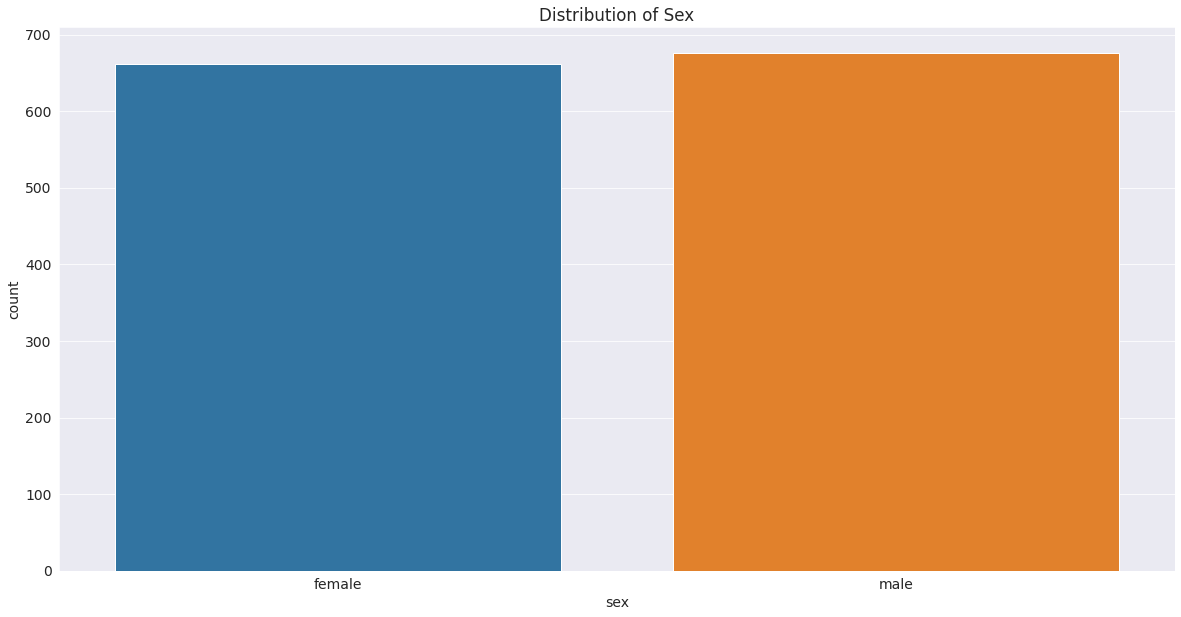

In [18]:
# plotting a countplot
sns.countplot(x = 'sex', data = train_df).set(title = 'Distribution of Sex');

### Smoker Column

In [19]:
train_df[['smoker']]

smoker
0       yes
1        no
2        no
3        no
4        no
...     ...
1333     no
1334     no
1335     no
1336     no
1337    yes

[1338 rows x 1 columns]

In [20]:
train_df.smoker.value_counts()/len(train_df.smoker)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

It looks like almost 80 % of the customers do not smoke.

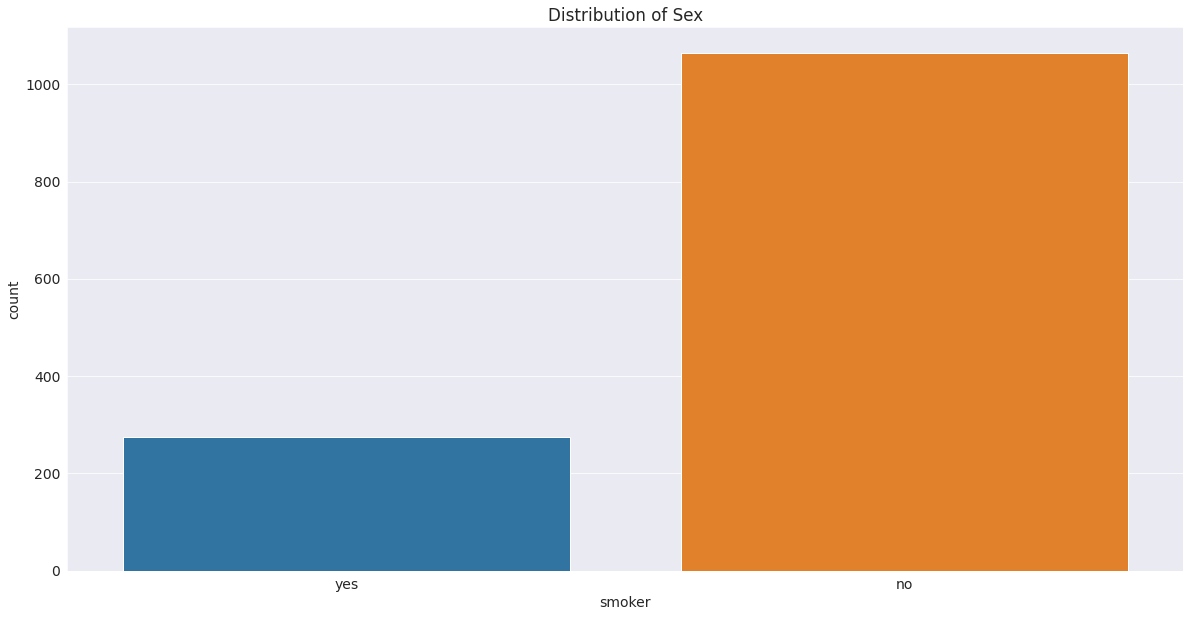

In [21]:
sns.countplot(x = train_df.smoker).set(title = 'Distribution of Sex');

In [22]:
yes = train_df[train_df.smoker == 'yes'].smoker.value_counts()/len(train_df.smoker)
no = train_df[train_df.smoker == 'no'].smoker.value_counts()/len(train_df.smoker)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


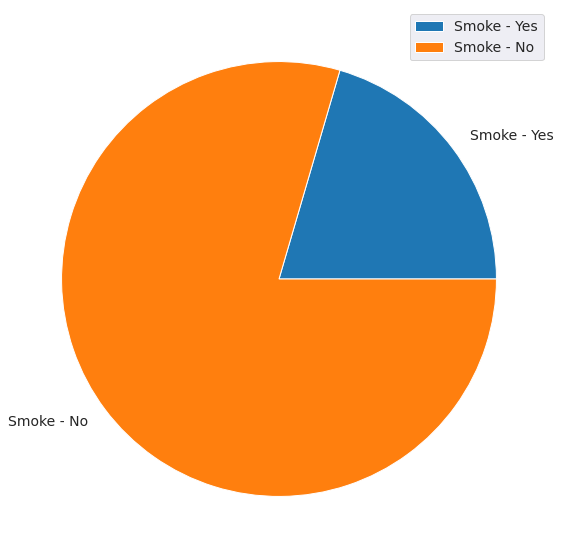

In [23]:
# plotting pie chart
plt.pie(x = [yes,no], labels = ['Smoke - Yes','Smoke - No'])
plt.legend()
plt.show();

### Region Column

In [24]:
train_df.region

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: string

In [25]:
train_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: Int64

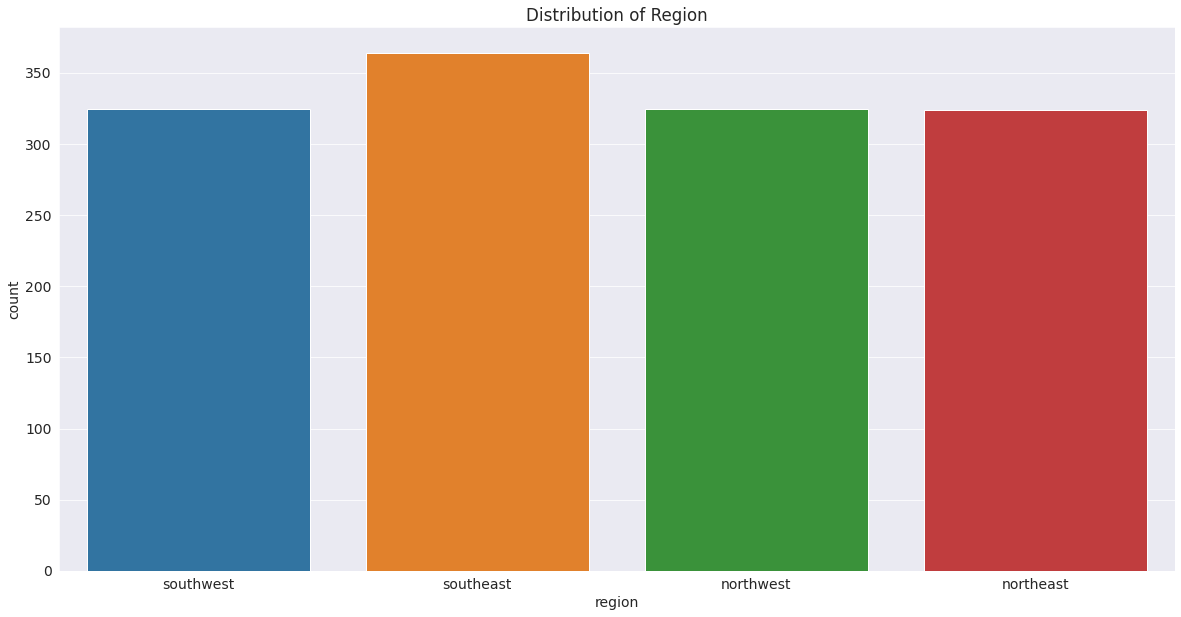

In [26]:
sns.countplot(x = train_df.region).set(title = 'Distribution of Region');

We can clearly see that the majority of customers are from southeast region.

### Age Column

In [27]:
len(train_df.age.unique().tolist())

47

Since there are 47 different agesm, we will use 47 bins in our histogram to visualize each age.

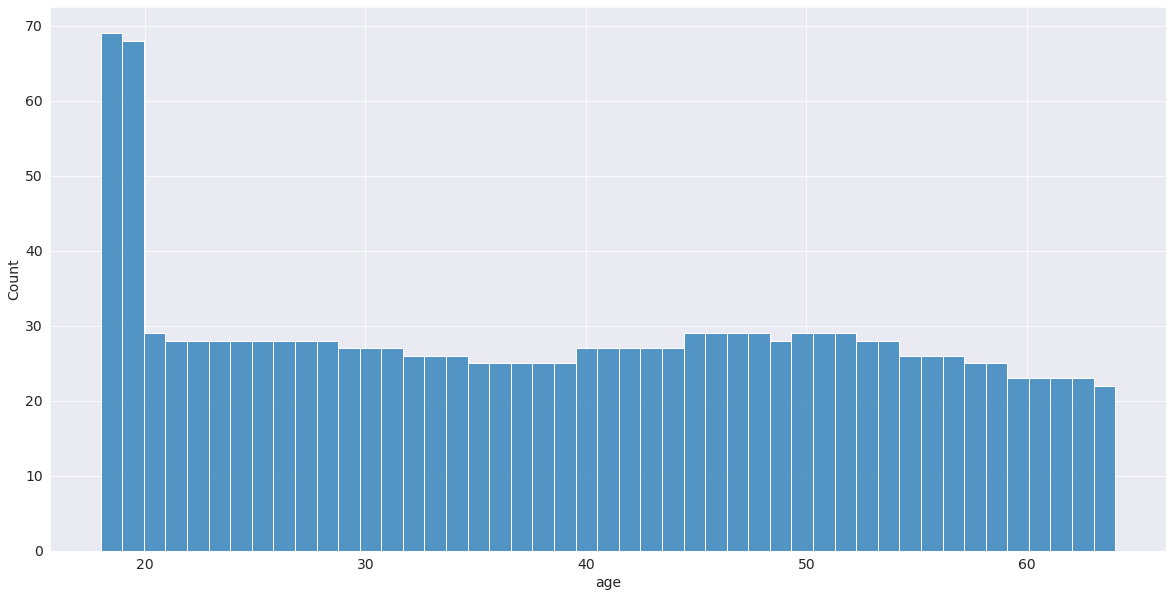

In [28]:
sns.histplot(x = train_df.age, bins = 47);

We can clearly see that the age column has almost a uniform distribution.

### BMI (Body Mass Index) Column

In [29]:
train_df.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

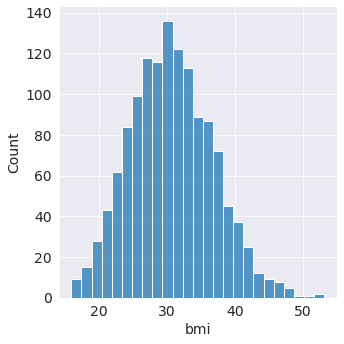

In [30]:
sns.displot(x = train_df.bmi);

We can clearly see that the `bmi` column has a normal distribution.

### Children Column

In [31]:
train_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

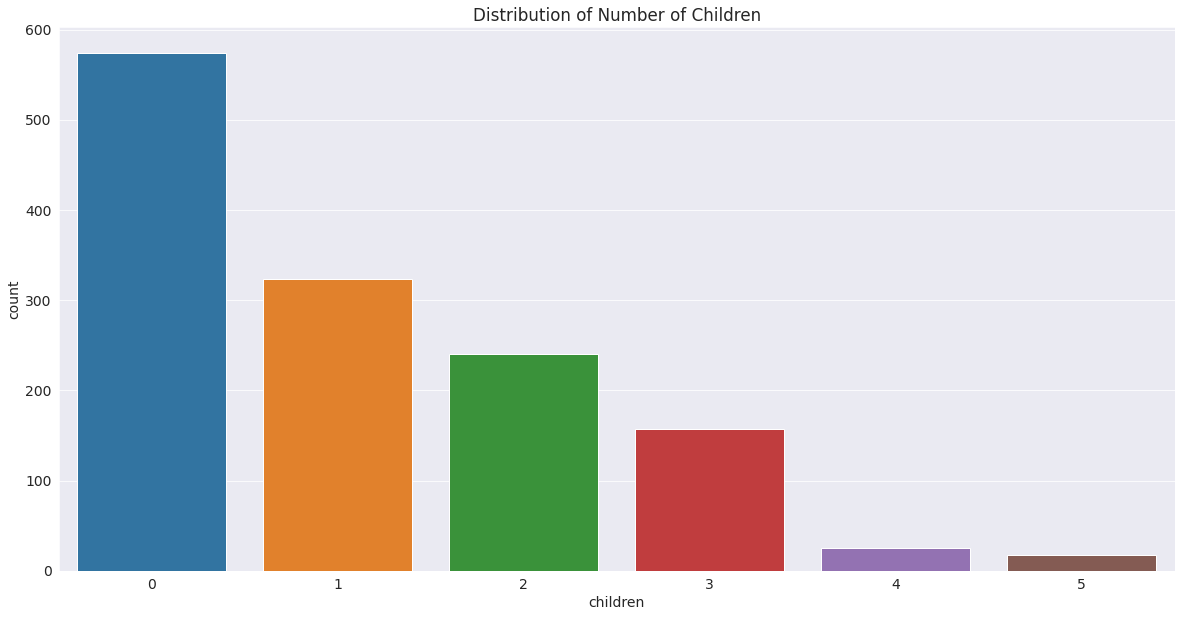

In [32]:
sns.countplot(x = train_df.children).set(title = 'Distribution of Number of Children');

In [33]:
zero = train_df[train_df.children == 0].children.value_counts()/len(train_df.children)
one = train_df[train_df.children == 1].children.value_counts()/len(train_df.children)
two = train_df[train_df.children == 2].children.value_counts()/len(train_df.children)
three = train_df[train_df.children == 3].children.value_counts()/len(train_df.children)
four = train_df[train_df.children == 4].children.value_counts()/len(train_df.children)
five = train_df[train_df.children == 5].children.value_counts()/len(train_df.children)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


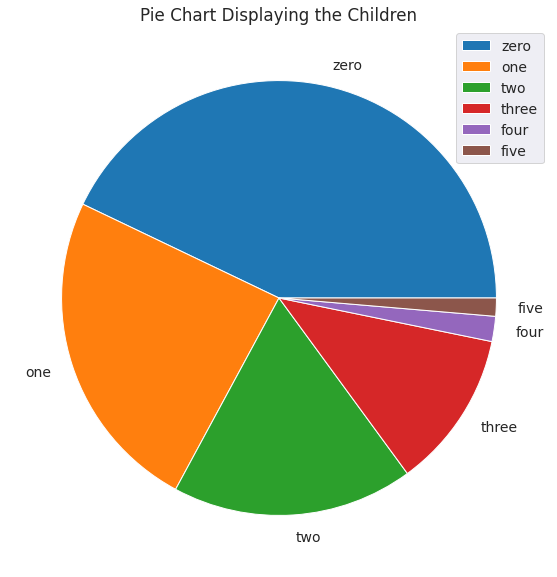

In [34]:
plt.pie(x = [zero,one,two,three,four,five], labels = ['zero','one','two','three','four','five'])
plt.title('Pie Chart Displaying the Children')
plt.legend()
plt.show();

### Charges

In [35]:
train_df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

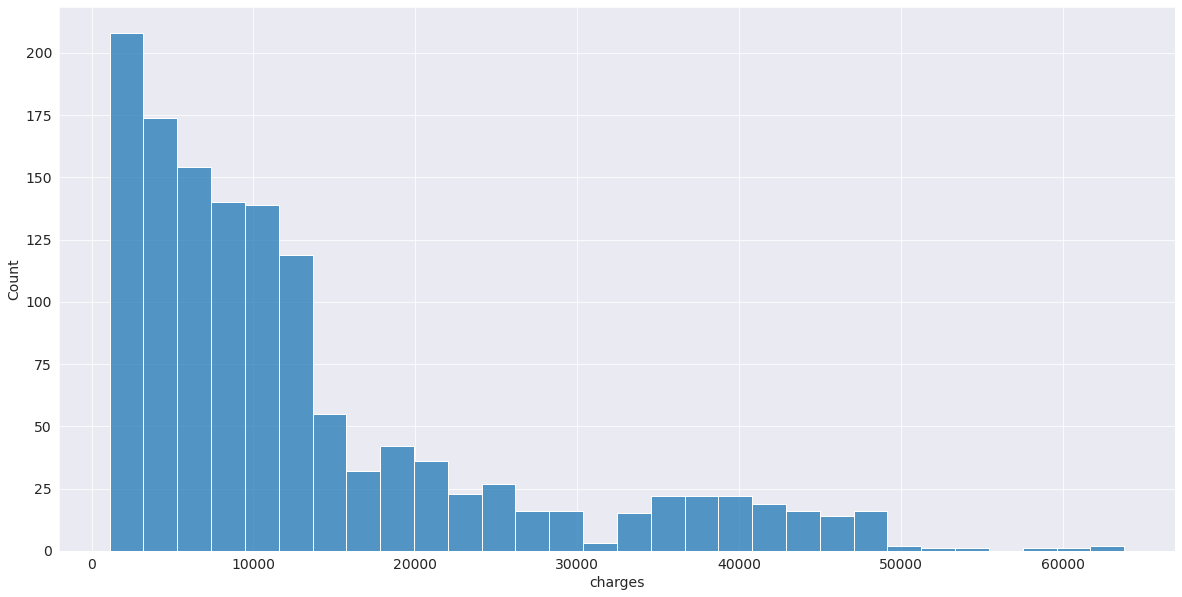

In [36]:
sns.histplot(x = train_df.charges, bins = 30);

### Age vs Charges According to Smoker, Sex, Region, and Children

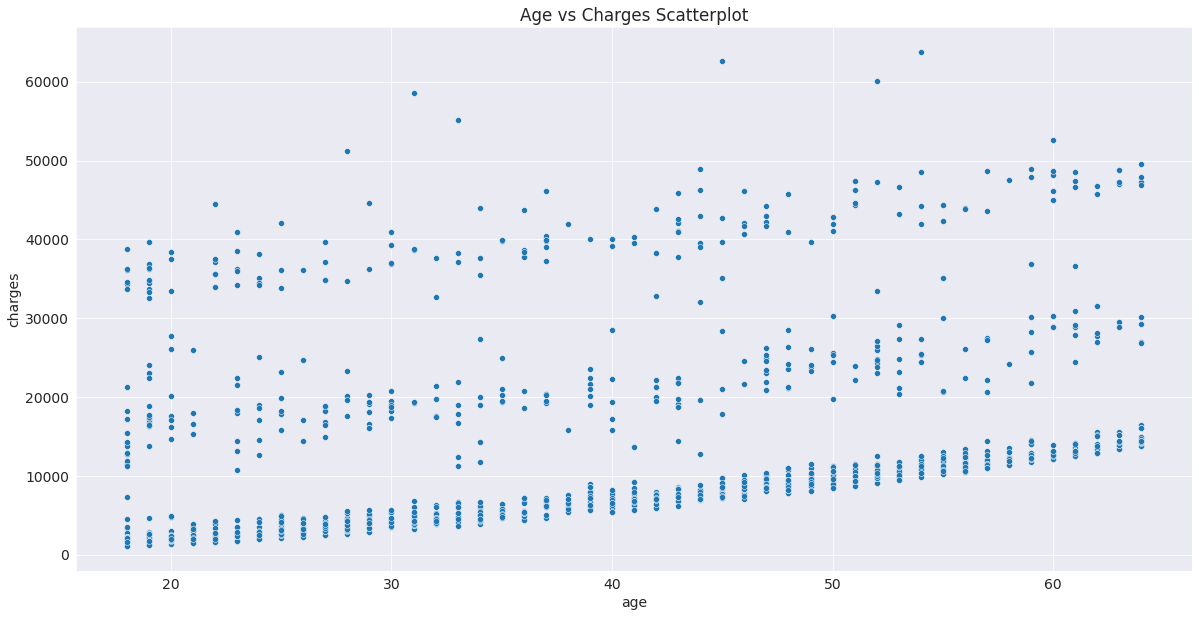

In [37]:
sns.scatterplot(x = 'age', y = 'charges', data = train_df).set(title = "Age vs Charges Scatterplot");

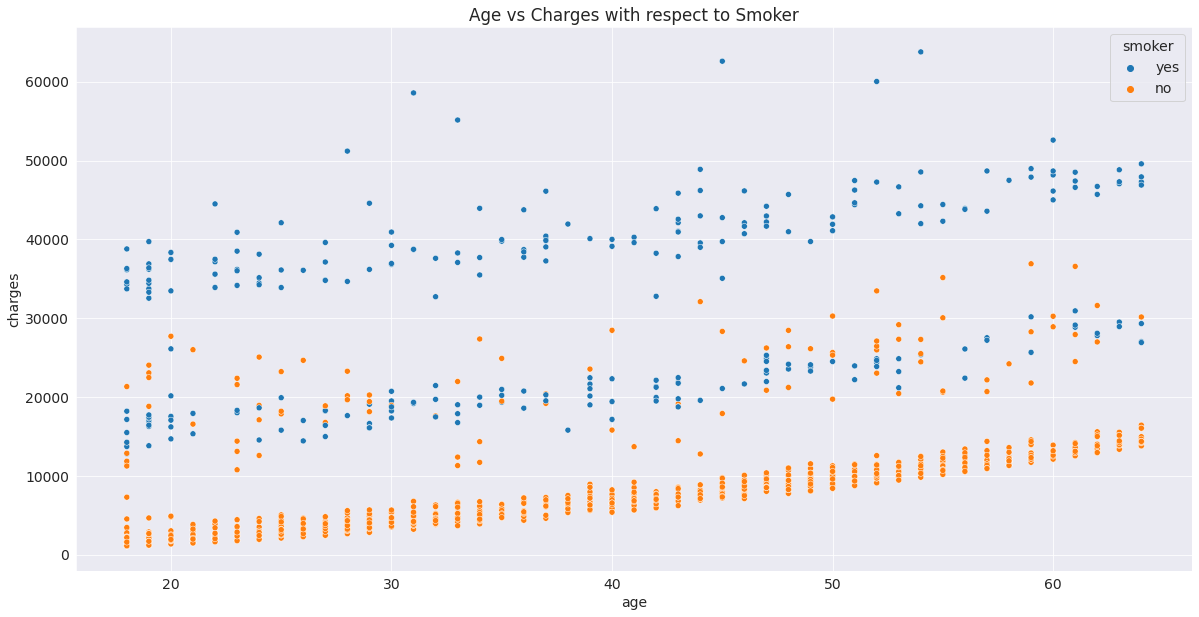

In [38]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = train_df).set(title = "Age vs Charges with respect to Smoker");

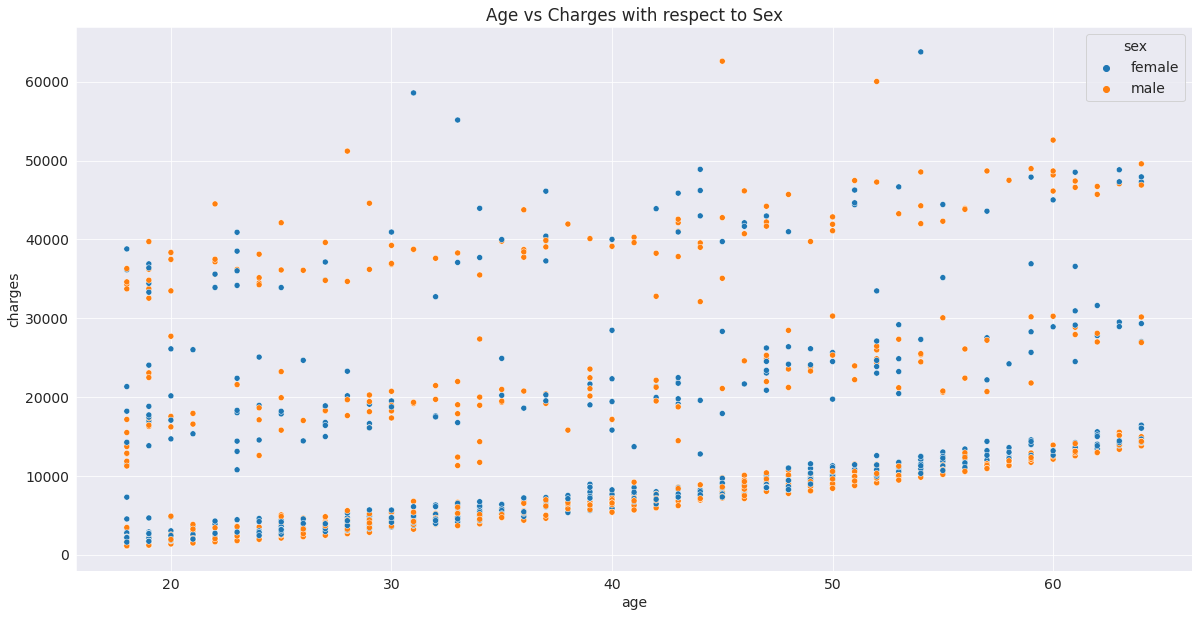

In [39]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'sex', data = train_df).set(title = "Age vs Charges with respect to Sex");

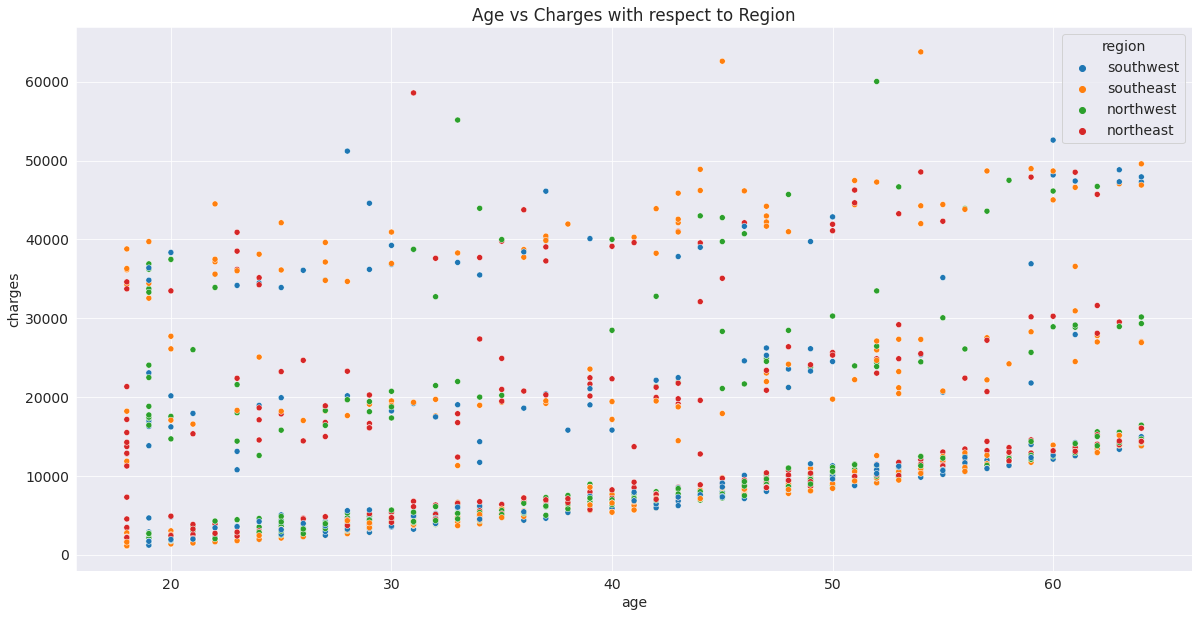

In [40]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'region', data = train_df).set(title = "Age vs Charges with respect to Region");

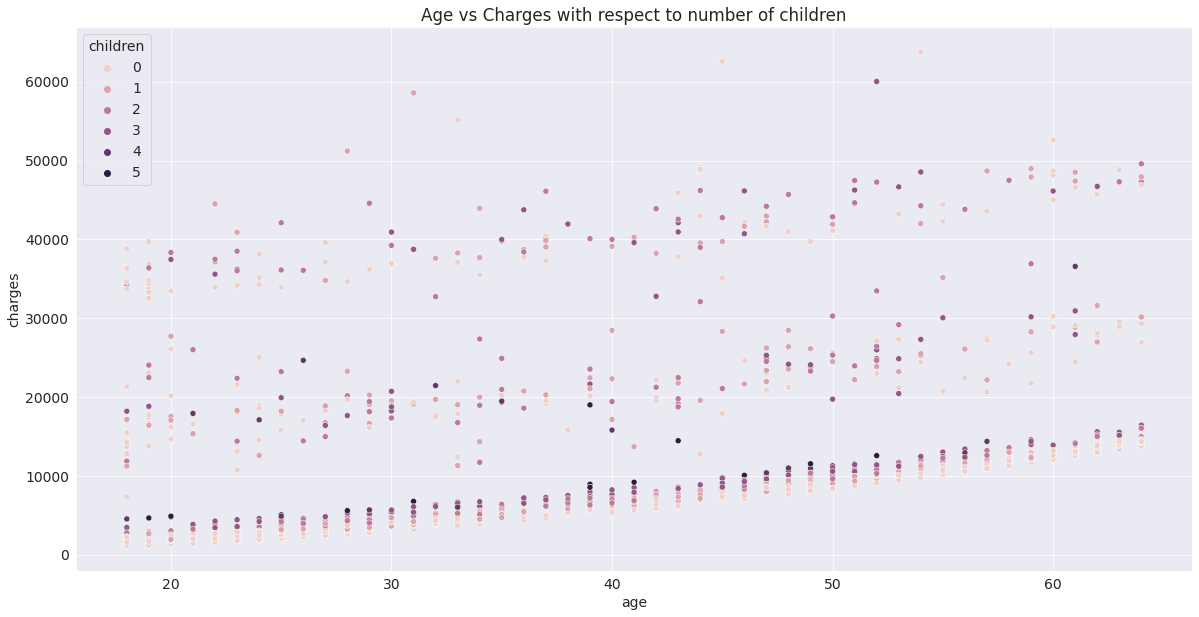

In [41]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'children', data = train_df).set(title = "Age vs Charges with respect to number of children");

### Bmi vs Charges According to Smoker, Sex, Region, and Children

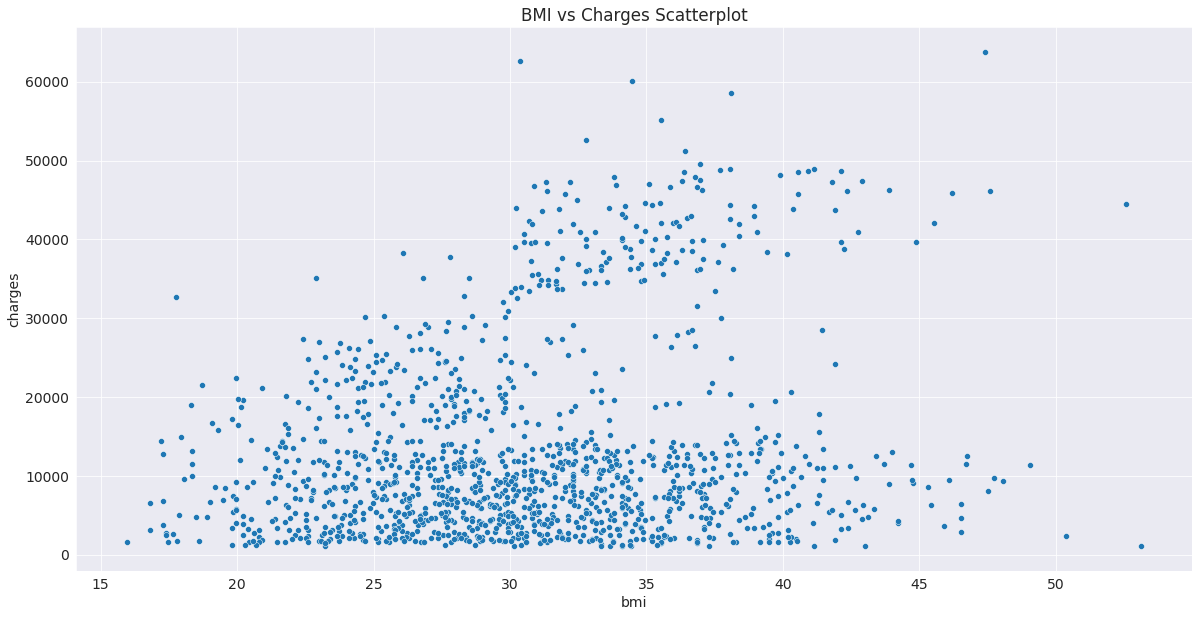

In [42]:
sns.scatterplot(x = 'bmi', y = 'charges', data = train_df).set(title = 'BMI vs Charges Scatterplot');

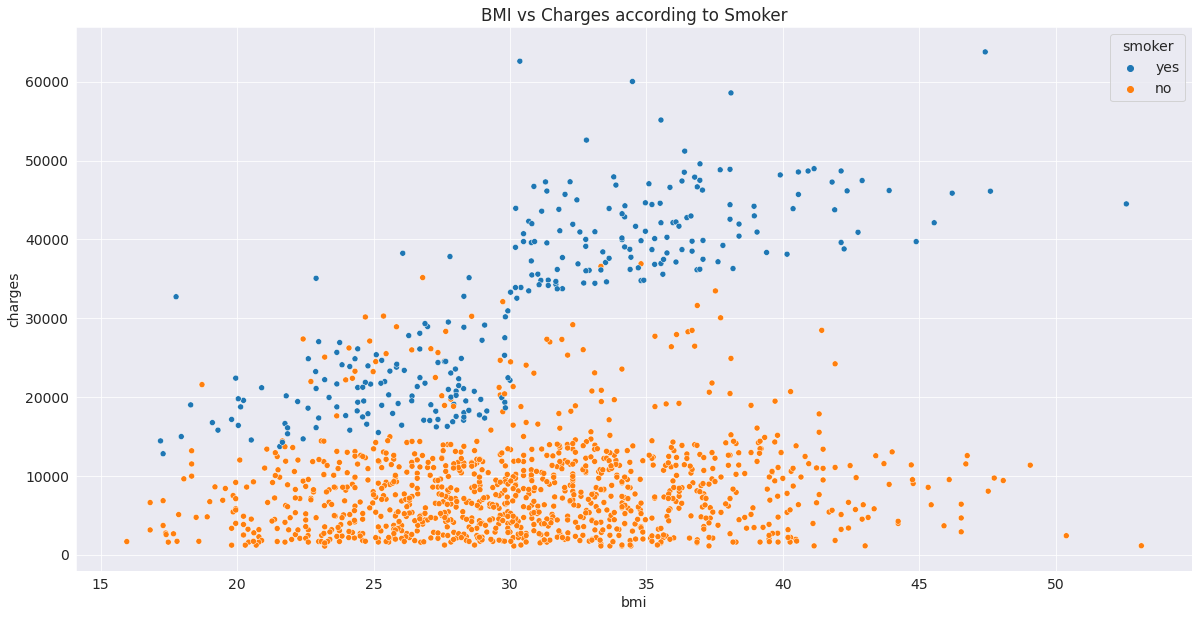

In [43]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = train_df).set(title = 'BMI vs Charges according to Smoker');

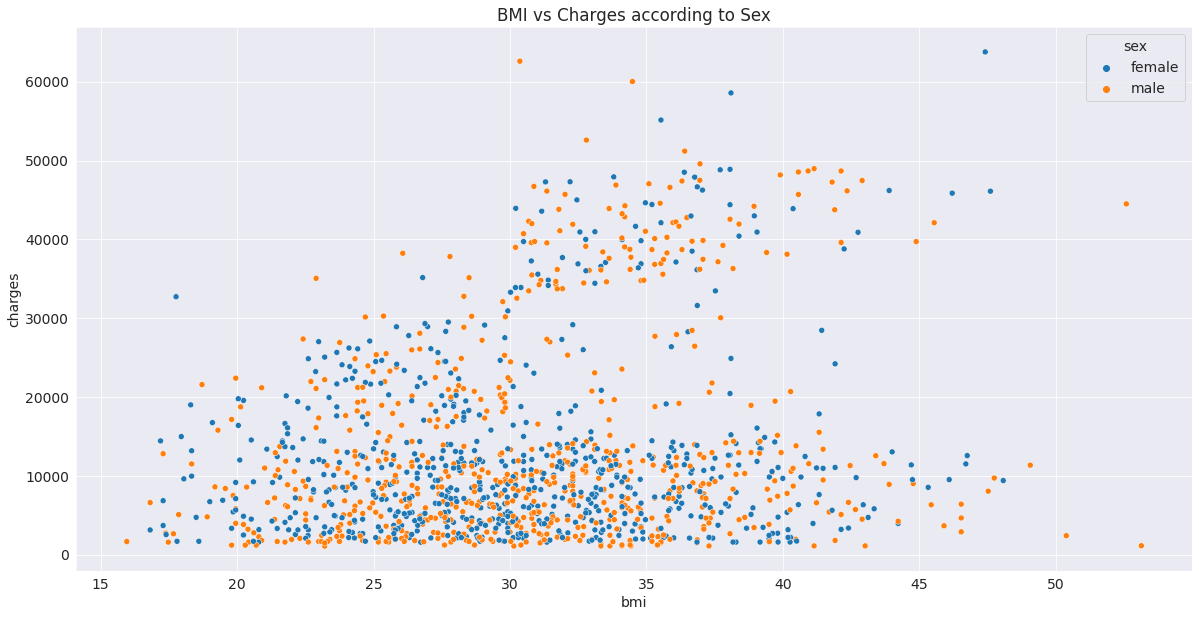

In [44]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'sex', data = train_df).set(title = 'BMI vs Charges according to Sex');

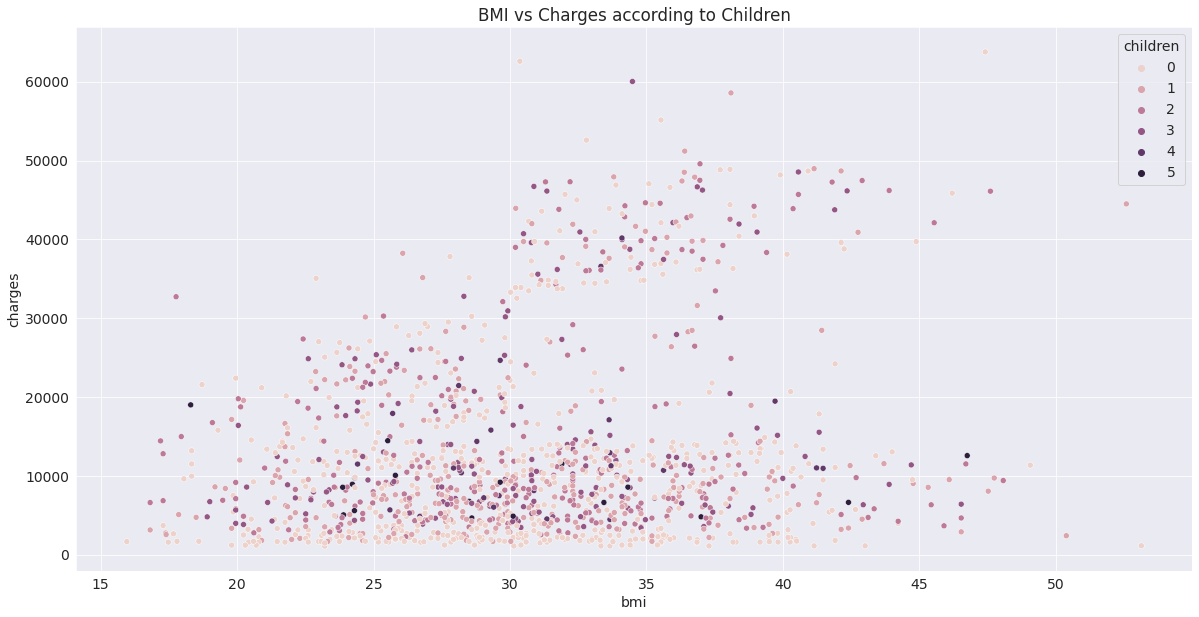

In [45]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'children', data = train_df).set(title = 'BMI vs Charges according to Children');

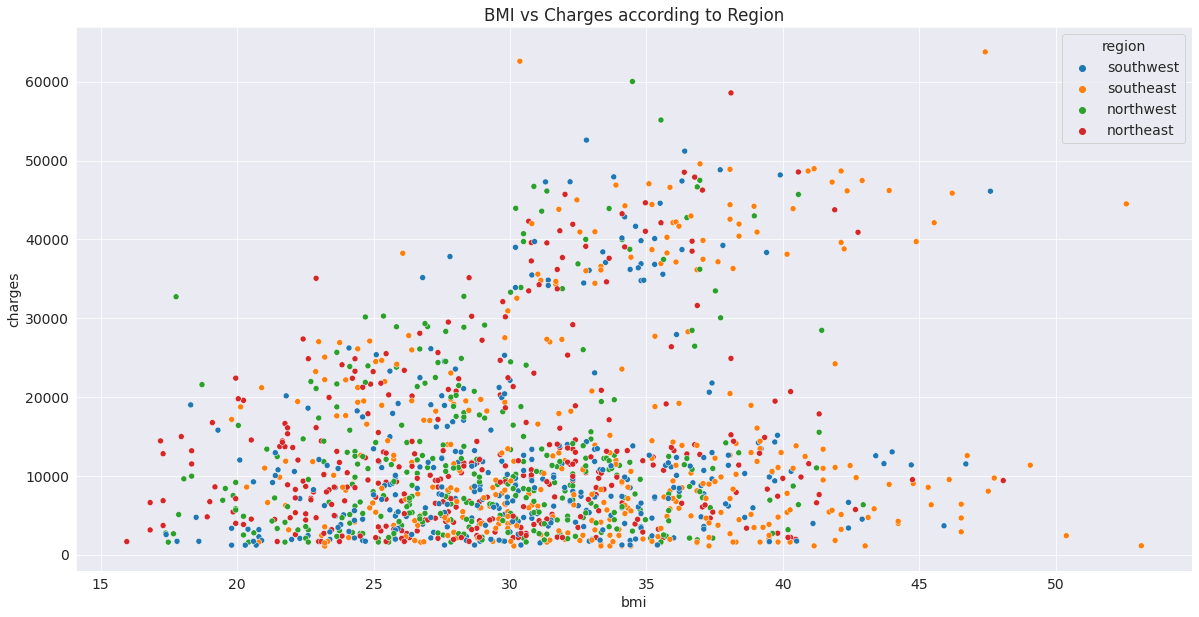

In [46]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'region', data = train_df).set(title = 'BMI vs Charges according to Region');

### Correlation

In [47]:
train_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

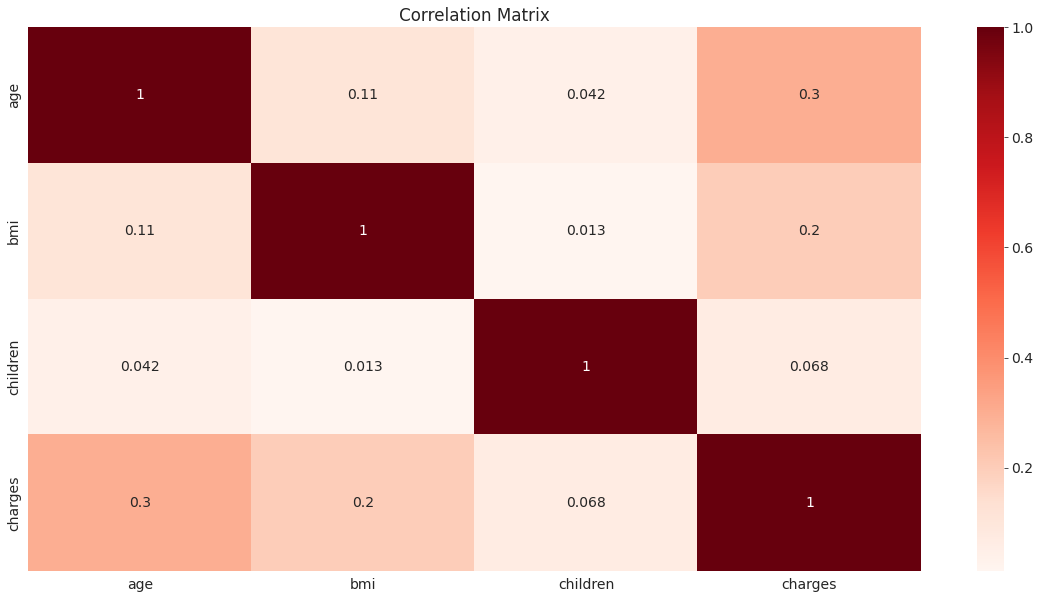

In [48]:
sns.heatmap(train_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

<b> We can clearly see that age is highly and positively correlated with charges. Thus, we can conclude that older people will most likely need more money from insurance and vice versa. 

Here's how correlation coefficients can be interpreted:

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

## Preprocessing and Feature Engineering

### Imputing Null Values

In [49]:
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there are no null values, we can simply skip the process of imputing.

### Encoding Categorical Columns using OneHot Encoder

In [50]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])

In [52]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [53]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])

In [54]:
train_df.drop(columns=categorical_cols,axis = 1, inplace = True)

In [55]:
train_df

age     bmi  ...  region_southeast  region_southwest
0      19  27.900  ...               0.0               1.0
1      18  33.770  ...               1.0               0.0
2      28  33.000  ...               1.0               0.0
3      33  22.705  ...               0.0               0.0
4      32  28.880  ...               0.0               0.0
...   ...     ...  ...               ...               ...
1333   50  30.970  ...               0.0               0.0
1334   18  31.920  ...               0.0               0.0
1335   18  36.850  ...               1.0               0.0
1336   21  25.800  ...               0.0               1.0
1337   61  29.070  ...               0.0               0.0

[1338 rows x 12 columns]

### Removing Duplicate Values/Rows

In [56]:
train_df.drop_duplicates(inplace = True)

## Preparing Training , Testing and Validation Set

In [57]:
# Feature Matrix
X = train_df.drop('charges',axis = 1)

# Response/Target Vector
y = train_df.charges

In [58]:
X.shape,y.shape

((1337, 11), (1337,))

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.20)

In [60]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.25)

In [61]:
X_train.shape,y_train.shape

((801, 11), (801,))

In [62]:
X_val.shape,y_val.shape

((268, 11), (268,))

In [63]:
X_test.shape,y_test.shape

((268, 11), (268,))

## Training Our Regression Models

This is a Regression problem. Thus, we will be making predictions using following models:

1. KNN Regressor

2. Linear Regression

3. Descision Tree

4. Random Forest

5. Gradient Boosting Machines (XGBRegressor)
 
The above models will be used to make predictions. The models will also undergo hyperparameter tuning to boost accuracy as well. Each models best predictions will also be recorded. 

### <b> KNN Regressor Model </b>

#### Training the KNN Model

In [69]:
# importing the KNN model
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors = 5,weights = 'uniform',leaf_size = 30)  # Instantiating the default KNeighborsClassifier class

In [70]:
Knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [71]:
train_pred = Knn.predict(X_train)

In [72]:
validation_pred = Knn.predict(X_val)

#### Loss Function For KNN model

<b> Mean Absolute Error </b>

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_pred)

5485.383827855181

<b> Mean Squared Error</b>

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_pred)

72158400.14132316

<b> Root Mean Squared Error </b>

In [75]:
np.sqrt(mean_squared_error(y_train,train_pred))

8494.610064112605

We will be using Root Mean Squared Error to calculate loss for our models from now on.

In [76]:
# for training data
np.sqrt(mean_squared_error(y_train,train_pred))

8494.610064112605

In [77]:
# for validation data
np.sqrt(mean_squared_error(y_val,validation_pred))

9862.380189414076

We can see that our loss for testing data is approximately $ 8339, but on  validation data, our model has approximately $ 9862 of RMSE. We can improve our model by Tuning the hyperparameters.

#### Tuning the Hyperparameters for KNNRegressor Model

We will mainly tune the following hypperparameters for our `KNN` model:
 1. n_neighbors
 2. weights
 3. leaf_size

<b> Tuning the n_neighbors Hyperparameter </b>

In [78]:
%%time 

# by default n_neighbors or k == 5
training_errors = []
validation_errors = []

for i in range(1,30):
  Knn = KNeighborsRegressor(n_neighbors = i,weights = 'uniform',leaf_size = 30, n_jobs = -1)
  Knn.fit(X_train,y_train)
  training_errors.append(np.sqrt(mean_squared_error(y_train,Knn.predict(X_train))))
  validation_errors.append(np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))))

CPU times: user 590 ms, sys: 59 ms, total: 649 ms
Wall time: 6.04 s


In [79]:
print('When n_neighbors = '+str(training_errors.index(min(training_errors))+1)+" ,the minimum RMSE training error = "+str(min(training_errors)))

When n_neighbors = 1 ,the minimum RMSE training error = 0.0


In [80]:
print('When n_neighbors = '+str(validation_errors.index(min(validation_errors))+1)+" ,the minimum RMSE validation error = "+str(min(validation_errors)))

When n_neighbors = 11 ,the minimum RMSE validation error = 9789.207277552217


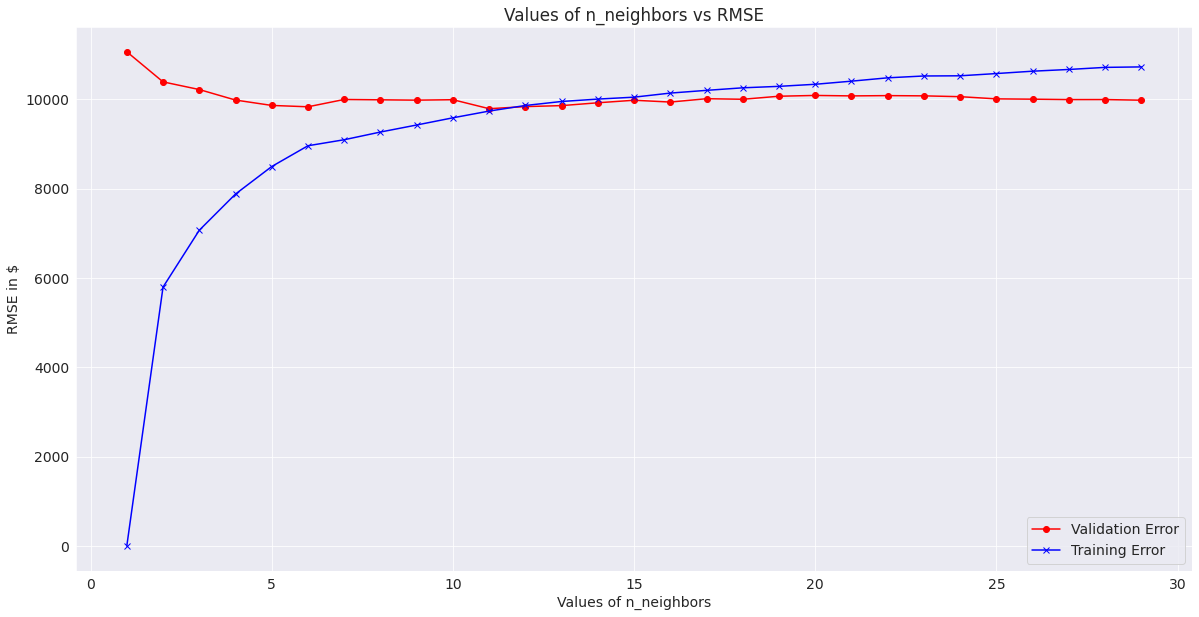

In [81]:
# Plotting in graph: Values of n_neighbors vs RMSE Error
plt.plot(range(1,30),validation_errors, color = 'red', marker = 'o')
plt.plot(range(1,30), training_errors, color = 'blue', marker = 'x')
plt.xlabel('Values of n_neighbors')
plt.ylabel('RMSE in $')
plt.title('Values of n_neighbors vs RMSE')
plt.legend(['Validation Error','Training Error']);

We can clearly see that our Knn model is overfitting with the training data when k = 1, and k = 2. Furthermore, the model has significantly higher RMSE when n_neighbors is increasing on training data. However, our model is performing better when n_neighbors = 11 on the validation set. Thus, we will tune our model that way.

In [82]:
# Tuned Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 30).fit(X_train,y_train)

<b> Tuning the Weights Hyperparameter </b>

In [83]:
Knn = KNeighborsRegressor(n_neighbors = 11,weights = 'uniform',leaf_size = 30, n_jobs = -1)
Knn.fit(X_train,y_train)

Knn1 = KNeighborsRegressor(n_neighbors = 11,weights = 'distance',leaf_size = 30, n_jobs = -1).fit(X_train,y_train)

In [84]:
dict1 = {'Models':['Tuned Validation Error','Tuned Training Error','Untuned Validation Error','Untuned Training Error'],'Error':[np.sqrt(mean_squared_error(y_val,Knn1.predict(X_val))),np.sqrt(mean_squared_error(y_train,Knn1.predict(X_train))),np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))),np.sqrt(mean_squared_error(y_train,Knn.predict(X_train)))]}

In [85]:
tuned_df = pd.DataFrame(dict1) #.reset_index()
tuned_df['Bool'] = [True,False,True,False]
tuned_df

Models        Error   Bool
0    Tuned Validation Error  9598.536330   True
1      Tuned Training Error     0.000000  False
2  Untuned Validation Error  9789.207278   True
3    Untuned Training Error  9735.934601  False

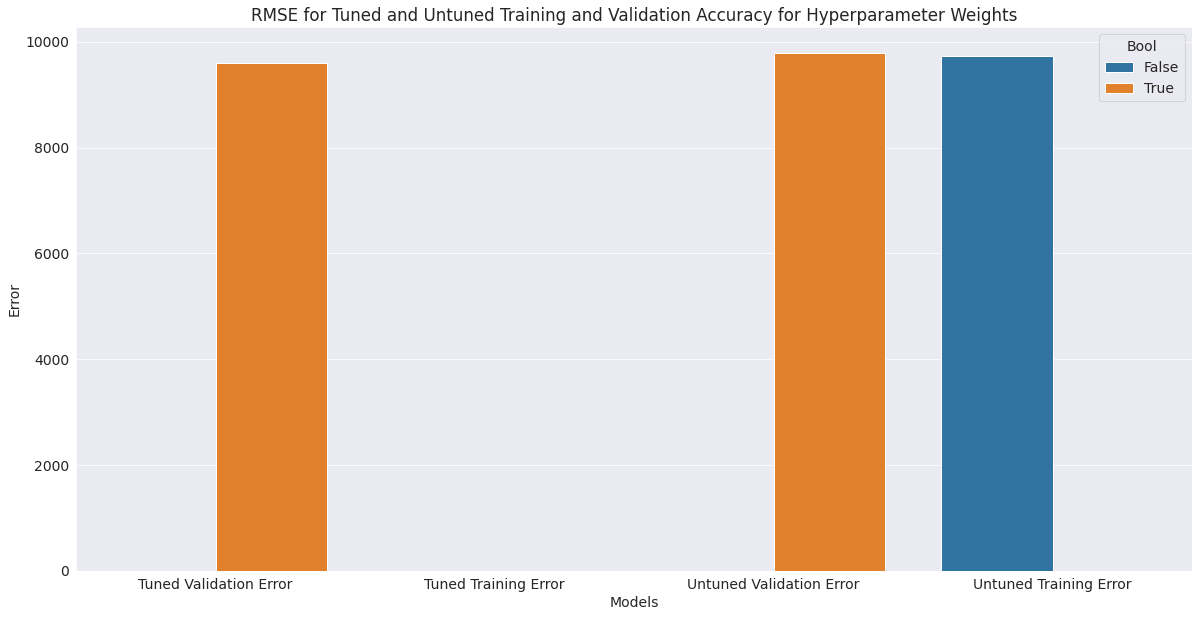

In [86]:
sns.barplot(x = 'Models', y ='Error', data = tuned_df, hue = 'Bool').set(title = 'RMSE for Tuned and Untuned Training and Validation Accuracy for Hyperparameter Weights');

It looks like it is best if we leave the weights hyperparameter to its default value.

In [87]:
# Tuned Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 30).fit(X_train,y_train)

<b> Tuning Leaf Size Hyperparameter <b>

In [88]:
leaf_size_values = [5,10] + list(range(25,325,25))

training_errors = []
validation_errors = []

for i in leaf_size_values:
  Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = i).fit(X_train,y_train)
  training_errors.append(np.sqrt(mean_squared_error(y_train,Knn.predict(X_train))))
  validation_errors.append(np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))))

In [89]:
print('When leaf_size = '+str(leaf_size_values[(training_errors.index(min(training_errors))+1)])+" ,the minimum RMSE training error = "+str(min(training_errors)))

When leaf_size = 50 ,the minimum RMSE training error = 9734.153069664282


In [90]:
print('When leaf_size = '+str(leaf_size_values[(validation_errors.index(min(validation_errors))+1)])+" ,the minimum RMSE Validation error = "+str(min(validation_errors)))

When leaf_size = 10 ,the minimum RMSE Validation error = 9789.207277552217


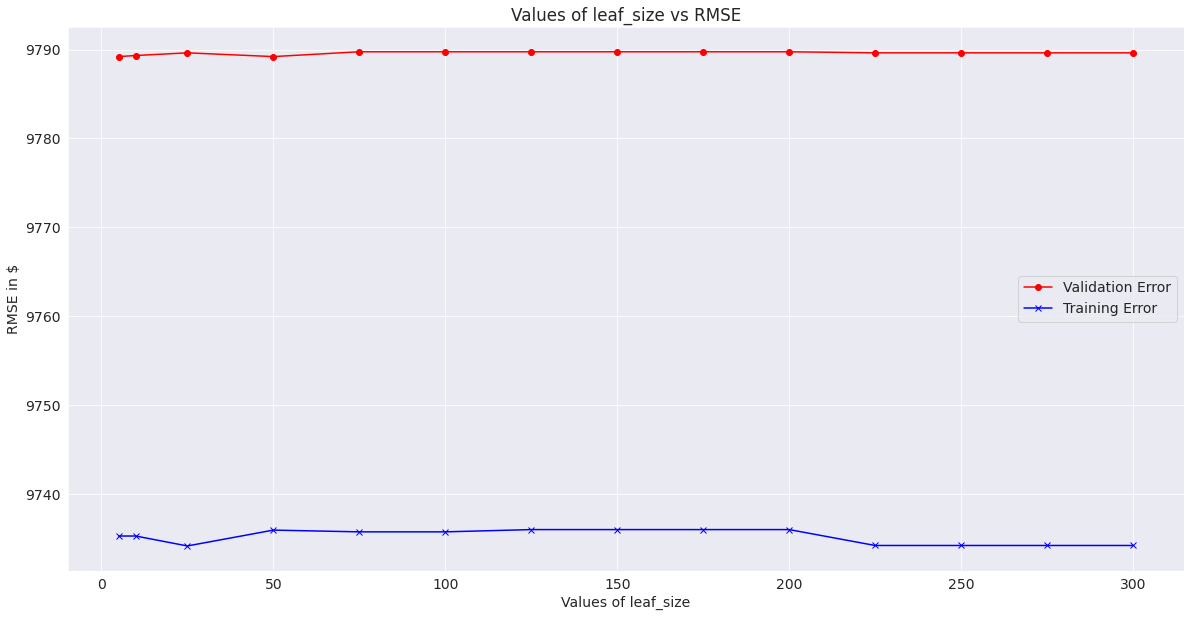

In [91]:
# Plotting in graph: Values of leaf_size vs RMSE Error
plt.plot(leaf_size_values,validation_errors, color = 'red', marker = 'o')
plt.plot(leaf_size_values, training_errors, color = 'blue', marker = 'x')
plt.xlabel('Values of leaf_size')
plt.ylabel('RMSE in $')
plt.title('Values of leaf_size vs RMSE')
plt.legend(['Validation Error','Training Error']);

We will tune our model such that leaf_size = 10

In [92]:
# Best Optimized Knn Regrssor Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 10).fit(X_train,y_train)

#### Making Predictions on Testing Data

In [93]:
test_pred = Knn.predict(X_test)

In [94]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  12150.095942764628


The RMSE calculated is very high, meaning that our model has performed very poorly on the testing data. Thus, we will train our model using other regression models to achieve better accuracy and reduce loss/error.

### <b> Linear Regression Model

#### Training the Linear Regression Model

In [95]:
# training our default linear regression model
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

In [96]:
# making predictions on training data
train_pred = log_reg.predict(X_train)

In [97]:
# Making Predictions on validation data
validation_pred = log_reg.predict(X_val)

In [98]:
# Lets see the coefficients for our selected features
log_reg.coef_

array([   242.91567173,    310.52268855,    509.39235351,     33.01681167,
          -33.01681167, -11600.54467957,  11600.54467957,    497.62789924,
         -154.9785801 ,   -278.29620092,    -64.35311822])

In [99]:
# Lets see the y_intercept of the model
log_reg.intercept_

329.8459286461748

In [100]:
log_reg.normalize

False

In [101]:
log_reg.fit_intercept

True

#### Loss Function For Linear Regression Model

In [102]:
# RMSE For Training Predictions
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
rmse_train

6175.140706590151

In [103]:
# RMSE for Validation Predictions
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

5806.0516538679585

Wow, Our Linear Regression has significantly less RMSE for both training and validation data than the KNN model. However, we will still tune this model's `Hyperparameters` to see if our model performs any better.

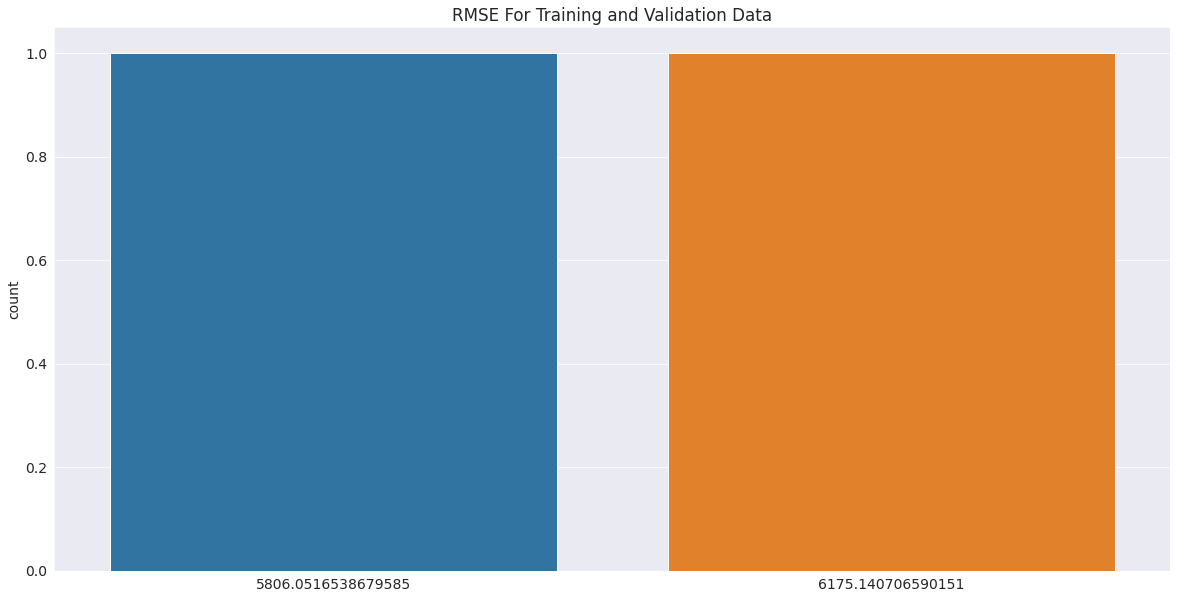

In [104]:
sns.countplot(x = [rmse_train,rmse_val]).set(title = 'RMSE For Training and Validation Data');

#### Hyperparameter Tuning For Linear Regression Model

We will tune the following Hyperparameters:
  
  1. normalize

  2. fit_intercept

In [105]:
# Our original Model
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

<b> Tuning Hyperparameter normalize </b>

In [106]:
# when normalize = False (default)
log_reg1 = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

rmse_train1 = np.sqrt(mean_squared_error(y_train, log_reg1.predict(X_train)))
rmse_val1 = np.sqrt(mean_squared_error(y_val, log_reg1.predict(X_val)))

In [107]:
# when normalize = True
log_reg2 = LinearRegression(n_jobs = -1, normalize = True, fit_intercept = True).fit(X_train,y_train)

rmse_train2 = np.sqrt(mean_squared_error(y_train, log_reg2.predict(X_train)))
rmse_val2 = np.sqrt(mean_squared_error(y_val, log_reg2.predict(X_val)))

In [108]:
dict1 = {
    'Models':['rmse_train1','rmse_train2','rmse_val1','rmse_val2'],
    'Values':[rmse_train1,rmse_train2,rmse_val1,rmse_val2],
    'Bool':[0,0,1,1]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

Models       Values  Bool
0  rmse_train1  6175.140707     0
1  rmse_train2  6175.140707     0
2    rmse_val1  5806.051654     1
3    rmse_val2  5806.051654     1

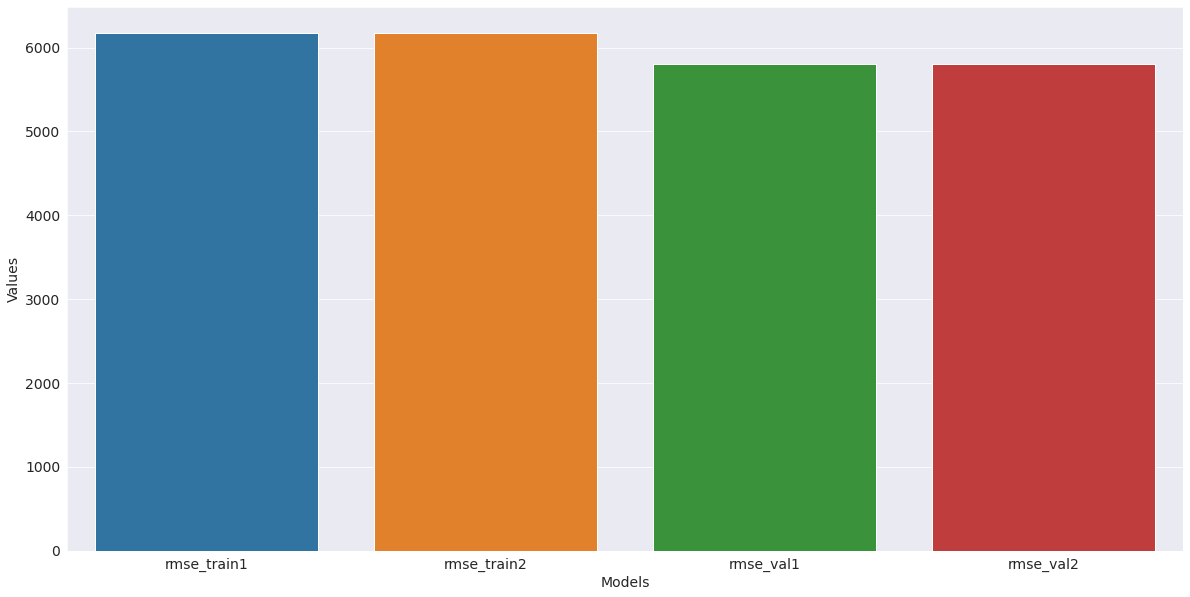

In [109]:
sns.barplot(data = tuned_df, x = 'Models',y = 'Values');

It looks like our model remains unaffected by changing the value of normalize. Thus, we will leave it to default.

<b> Tuning Hyperparameter fit_intercept </b>

In [110]:
# when fit_intercept = True (default)
log_reg1 = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

rmse_train1 = np.sqrt(mean_squared_error(y_train, log_reg1.predict(X_train)))
rmse_val1 = np.sqrt(mean_squared_error(y_val, log_reg1.predict(X_val)))

In [111]:
# when fit_intercept = False
log_reg2 = LinearRegression(n_jobs = -1, normalize = True, fit_intercept = False).fit(X_train,y_train)

rmse_train2 = np.sqrt(mean_squared_error(y_train, log_reg2.predict(X_train)))
rmse_val2 = np.sqrt(mean_squared_error(y_val, log_reg2.predict(X_val)))

In [112]:
dict1 = {
    'Models':['rmse_train1','rmse_train2','rmse_val1','rmse_val2'],
    'Values':[rmse_train1,rmse_train2,rmse_val1,rmse_val2]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

Models       Values
0  rmse_train1  6175.140707
1  rmse_train2  6175.140707
2    rmse_val1  5806.051654
3    rmse_val2  5806.051654

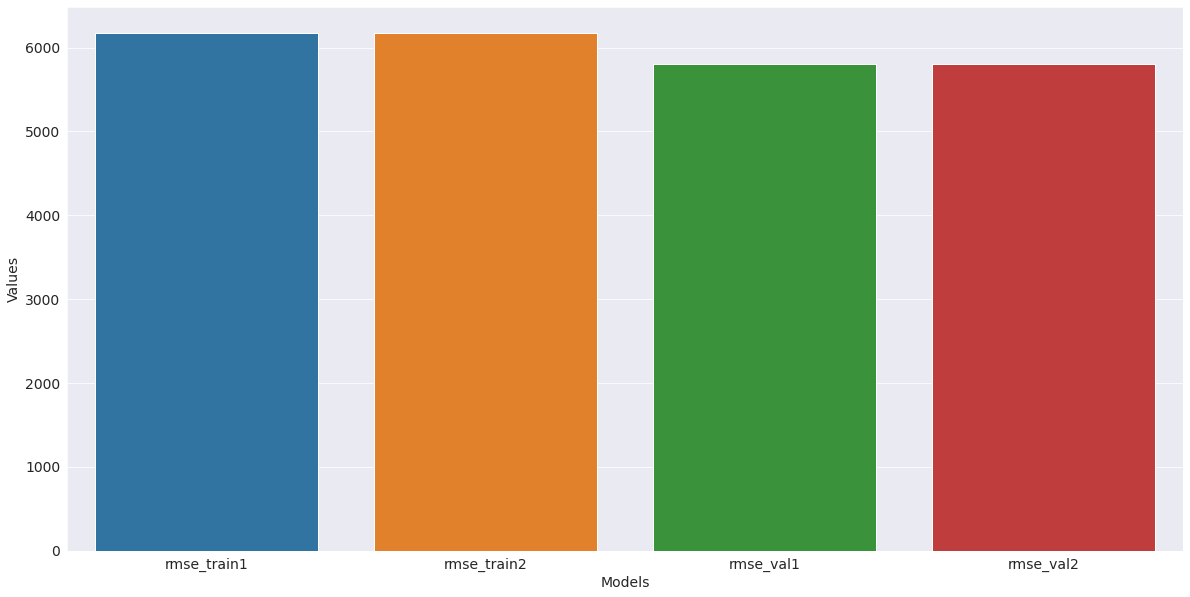

In [113]:
sns.barplot(data = tuned_df, x = 'Models',y = 'Values');

Well, it looks like the model is also unaffected with the change in value of this hyperparameter. Thus, we will use our default model to make predictions on the testing data, and compare the results with the results of the Knn Model.

#### Making Predictions on the Testing data with optimized Model

In [114]:
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

In [115]:
test_pred = log_reg.predict(X_test)

In [116]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  5975.162654151709


This model is significantly better than Knn Model, as Knn Model has significantly higher RMSE on testing data.

### <b> Descision Tree Model </b>

#### Training the Descision Tree Model

In [117]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42, max_depth = None, max_leaf_nodes = None).fit(X_train,y_train)

In [118]:
train_pred = tree.predict(X_train)

In [119]:
validation_pred = tree.predict(X_val)

In [120]:
# RMSE For training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_train

0.0

In [121]:
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

7169.519745812936

We can clearly see that our descision tree model has completely overfitted with the training data. Thus, in the next step, we will perform hyperparameter tuning to reduce overfitting on our model.

In [122]:
from sklearn.tree import plot_tree, export_text

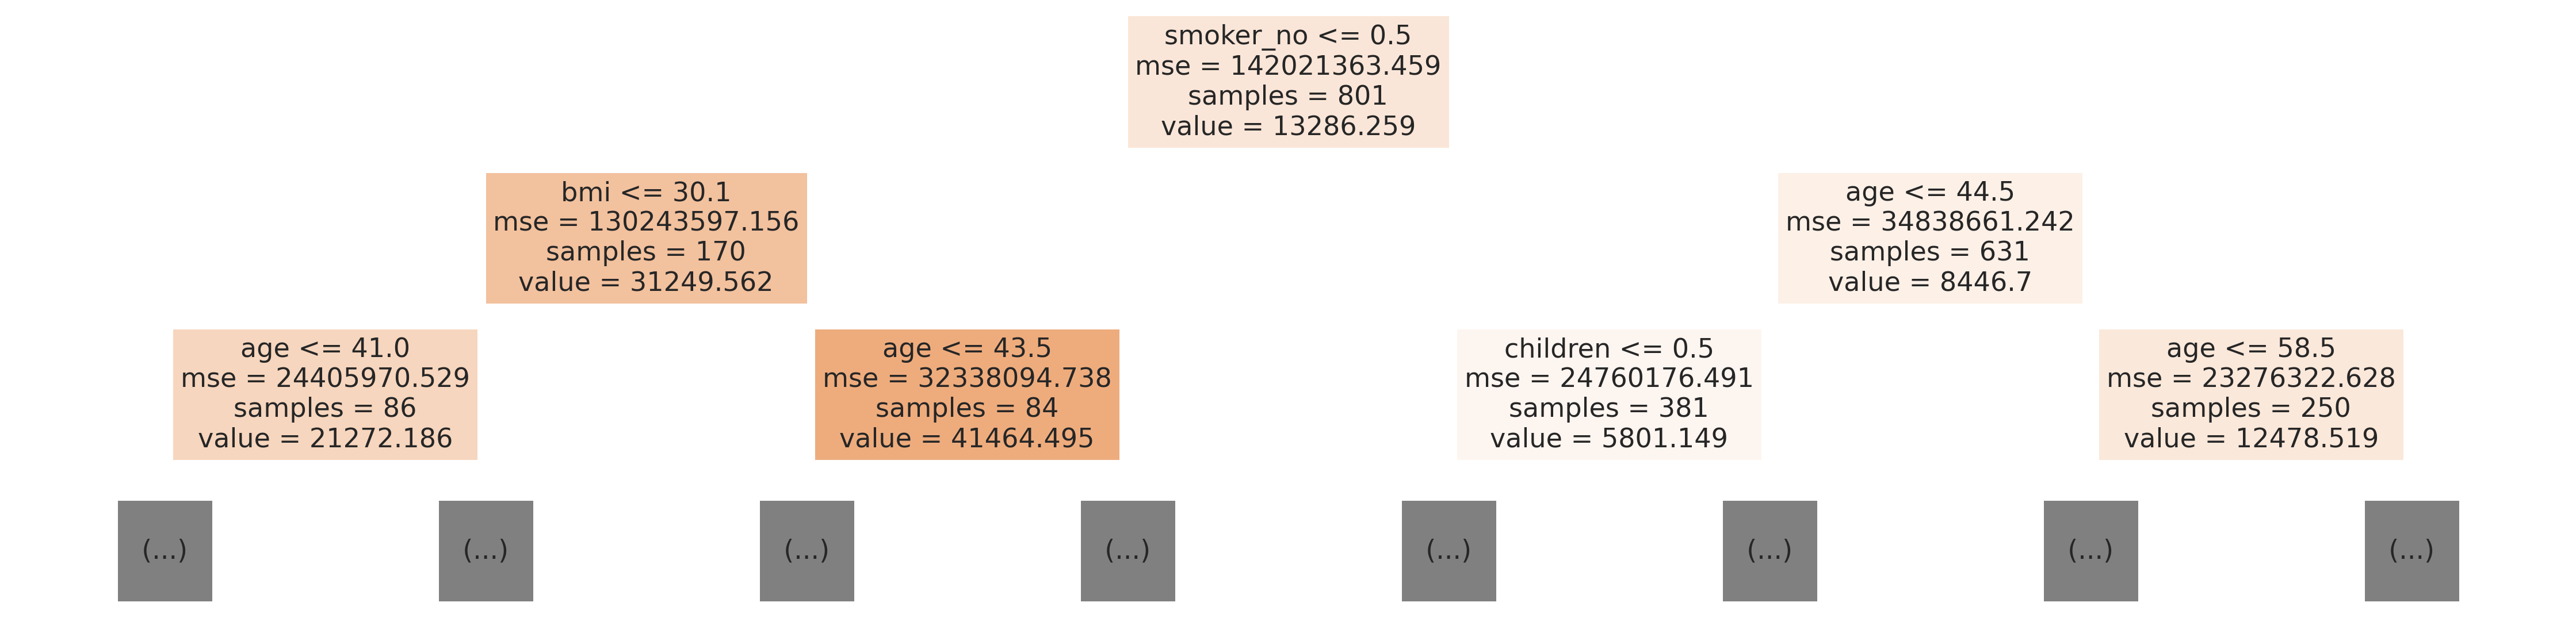

In [123]:
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names = X_train.columns,filled = True, max_depth =2);

In [124]:
tree.tree_.max_depth  #suruko tree vaneko teo model ho tree = DescisionTree() wala ra tespaxiko tree sabai pure syntax ho

21

In [125]:
tree_text = export_text(tree, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- smoker_no <= 0.50
|   |--- bmi <= 30.10
|   |   |--- age <= 41.00
|   |   |   |--- bmi <= 28.49
|   |   |   |   |--- age <= 29.50
|   |   |   |   |   |--- bmi <= 21.73
|   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |--- bmi <= 18.91
|   |   |   |   |   |   |   |   |--- value: [12829.46]
|   |   |   |   |   |   |   |--- bmi >  18.91
|   |   |   |   |   |   |   |   |--- region_northeast <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [13844.51]
|   |   |   |   |   |   |   |   |--- region_northeast >  0.50
|   |   |   |   |   |   |   |   |   |--- bmi <= 21.09
|   |   |   |   |   |   |   |   |   |   |--- value: [14571.89]
|   |   |   |   |   |   |   |   |   |--- bmi >  21.09
|   |   |   |   |   |   |   |   |   |   |--- value: [14283.46]
|   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |--- children <= 2.50
|   |   |   |   |   |   |   |   |--- value: [15006.58]
|   |   |   |   |   |   |   |--- children >  2.50
|   |   |   |   |   |   

In [126]:
# feature importances
tree.feature_importances_

array([0.12388929, 0.21647767, 0.02532338, 0.00389546, 0.00248824,
       0.61212244, 0.        , 0.00519117, 0.00231951, 0.00222747,
       0.00606537])

In [127]:
importances = {
    'Features':X_train.columns,
    'Weights':tree.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

Features   Weights
5          smoker_no  0.612122
1                bmi  0.216478
0                age  0.123889
2           children  0.025323
10  region_southwest  0.006065
7   region_northeast  0.005191
3         sex_female  0.003895
4           sex_male  0.002488
8   region_northwest  0.002320
9   region_southeast  0.002227
6         smoker_yes  0.000000

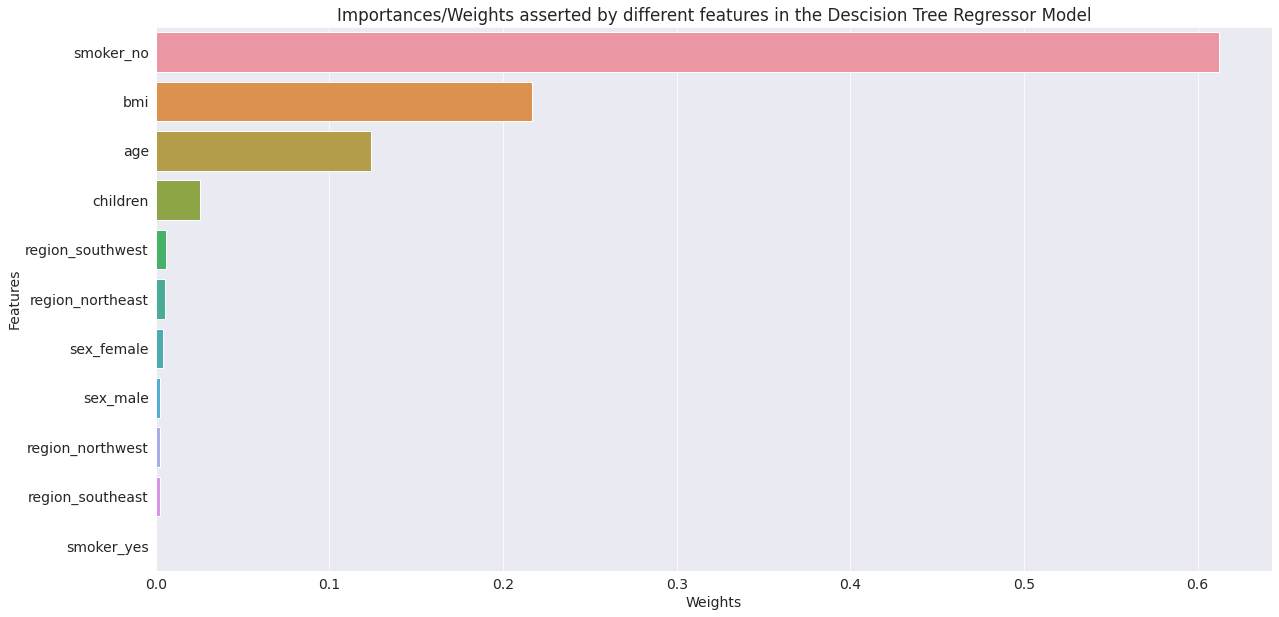

In [128]:
plt.title("Importances/Weights asserted by different features in the Descision Tree Regressor Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

We can see that our descision Tree model is mostly affected by the smoker_no column: It means the insurance cost is mostly affected if the person doesnot smoke.

#### Hyperparameter Tuning For Descision Tree Model

We will be tuning the following Hyperparameters:

  1. max_depth

  2. max_leaf_nodes

<b> Tuning the Hyperparameter max_depth </b>

In [129]:
tree.tree_.max_depth

21

In [130]:
max_depth_values = list(range(2,31,2))

training_rmse = []
validation_rmse = []

In [131]:
for i in max_depth_values:
  tree = DecisionTreeRegressor(random_state = 42, max_depth = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,tree.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,tree.predict(X_val))))

In [132]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df

Max Depth  Training RMSE  Validation RMSE
0           2    5005.368070      5304.116032
1           4    4245.907911      5162.837926
2           6    3700.884090      5569.913189
3           8    2855.273707      6134.519617
4          10    2015.891390      6516.936557
5          12    1296.125627      6870.942527
6          14    1010.536021      7007.161212
7          16     844.971543      6930.660725
8          18     355.677967      7210.232473
9          20       0.013197      7155.878564
10         22       0.000000      7169.519746
11         24       0.000000      7169.519746
12         26       0.000000      7169.519746
13         28       0.000000      7169.519746
14         30       0.000000      7169.519746

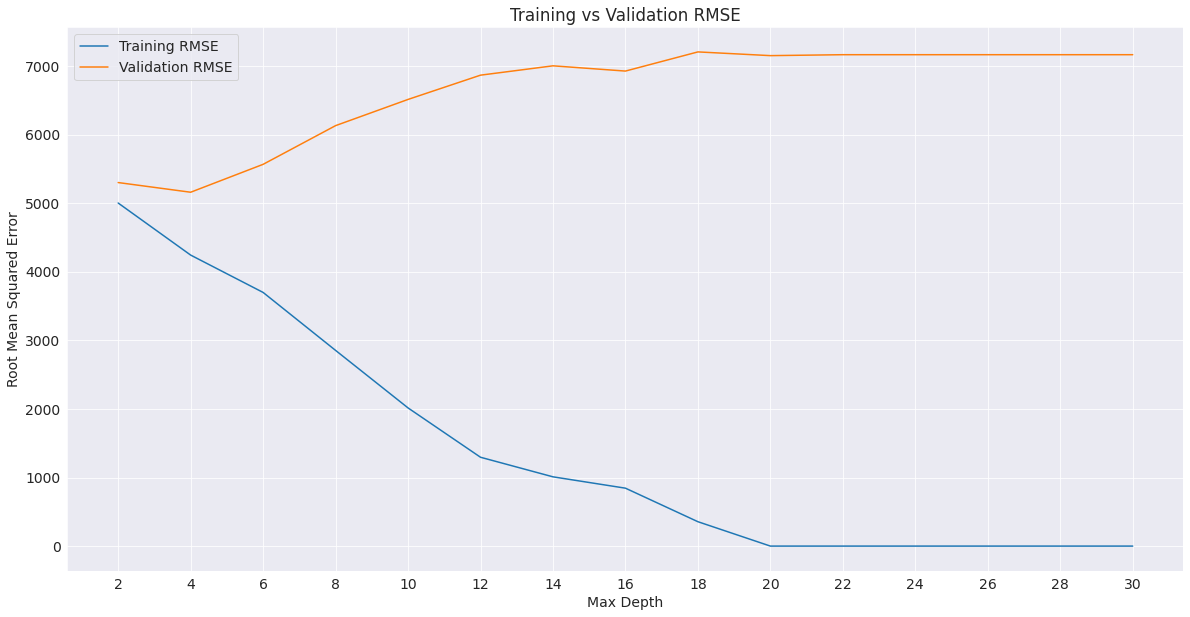

In [133]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.plot(errors_df['Max Depth'], errors_df["Training RMSE"])
plt.plot(errors_df['Max Depth'], errors_df["Validation RMSE"])
plt.xticks(max_depth_values)
plt.legend(['Training RMSE','Validation RMSE']);

We can see that our model performs best on validation set when max_depth = 4. It can also be seen that, with increase in max_depth's value, our model starts overfitting on the training data. Thus, we will tune our model with respect to model's efficiency in validation data.

In [134]:
tree = DecisionTreeRegressor(random_state = 42, max_depth = 4).fit(X_train,y_train)

<b> Tuning the Hyperparameter max_leaf_nodes </b>

In [135]:
max_leaf_nodes_values = [2 ** i for i in range(1,11)]

training_rmse = []
validation_rmse = []

In [136]:
for i in max_leaf_nodes_values:
  tree = DecisionTreeRegressor(random_state = 42, max_depth = 4, max_leaf_nodes = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,tree.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,tree.predict(X_val))))

In [137]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df

Max_leaf_nodes  Training RMSE  Validation RMSE
0               2    7422.054960      7363.338920
1               4    5005.368070      5304.116032
2               8    4533.121902      5083.089529
3              16    4245.907911      5162.837926
4              32    4245.907911      5162.837926
5              64    4245.907911      5162.837926
6             128    4245.907911      5162.837926
7             256    4245.907911      5162.837926
8             512    4245.907911      5162.837926
9            1024    4245.907911      5162.837926

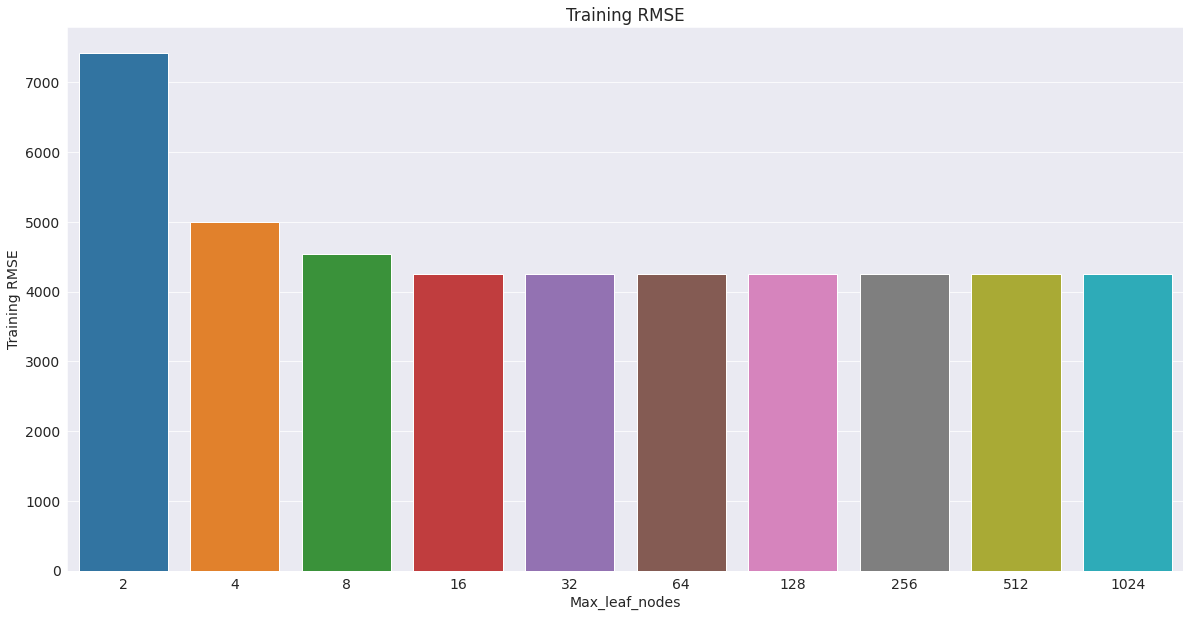

In [138]:
# plotting in graph
plt.title('Training RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training RMSE', data = errors_df);

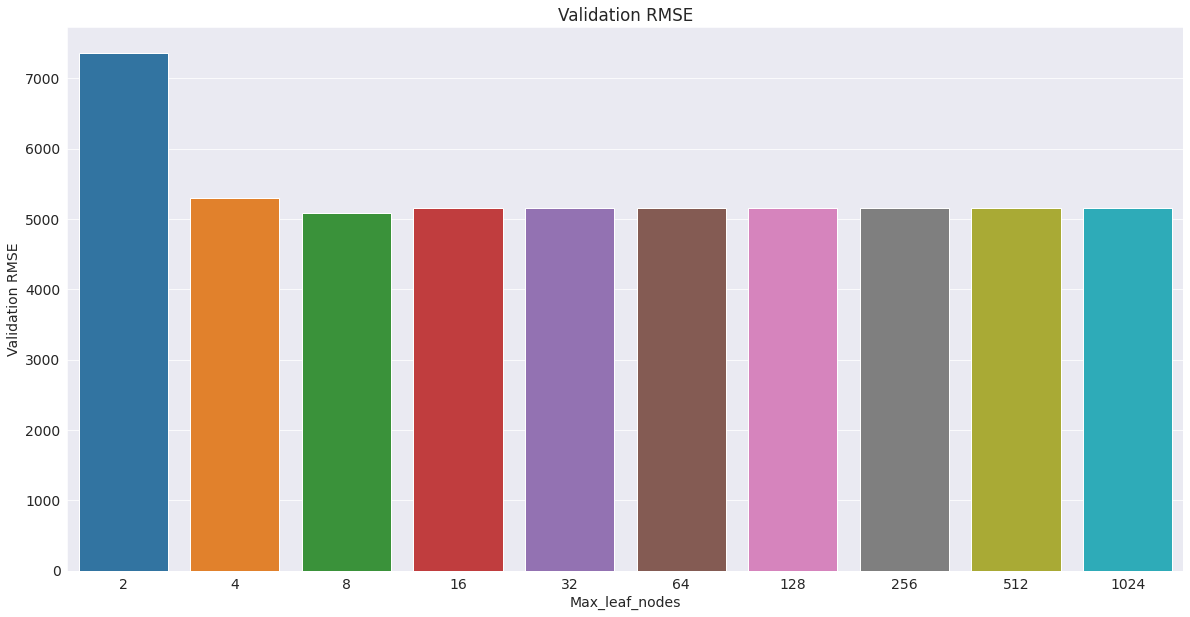

In [139]:
plt.title('Validation RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation RMSE', data = errors_df);

Our Model is performing best on both training and validation set when max_leaf_nodes = 8. Thus, we will tune our model that way

In [140]:
# Optimized Model
tree = DecisionTreeRegressor(max_leaf_nodes = 8 ,max_depth = 4, random_state = 42).fit(X_train,y_train)

#### Making Predictions on the Testing data with optimized Model

In [141]:
test_pred = tree.predict(X_test)

In [142]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  4485.311359605898


Our Descision Tree Regression model has performed even better than the Linear Regression model. However, we will still test our data with two additional models to see if we can get better results.

### <b> Random Forest Model

#### Training the Random Forest Regressor Model

In [143]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(X_train,y_train)

In [144]:
train_pred = forest.predict(X_train)

In [145]:
validation_pred = forest.predict(X_val)

In [146]:
# RMSE For training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_train

1829.099862087776

In [147]:
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

5133.201583537497

There is a good possibility that our model is overfitting with the training data. Thus, we will perform Hyperparameter tuning in the next step.

By default, there are 100 descision trees in the random forest classifier model. i.e n_estimators = 100

In [148]:
# selecting the first descision tree
forest.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1608637542, splitter='best')

In [149]:
# selecting the last descision tree
forest.estimators_[99]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=134489564, splitter='best')

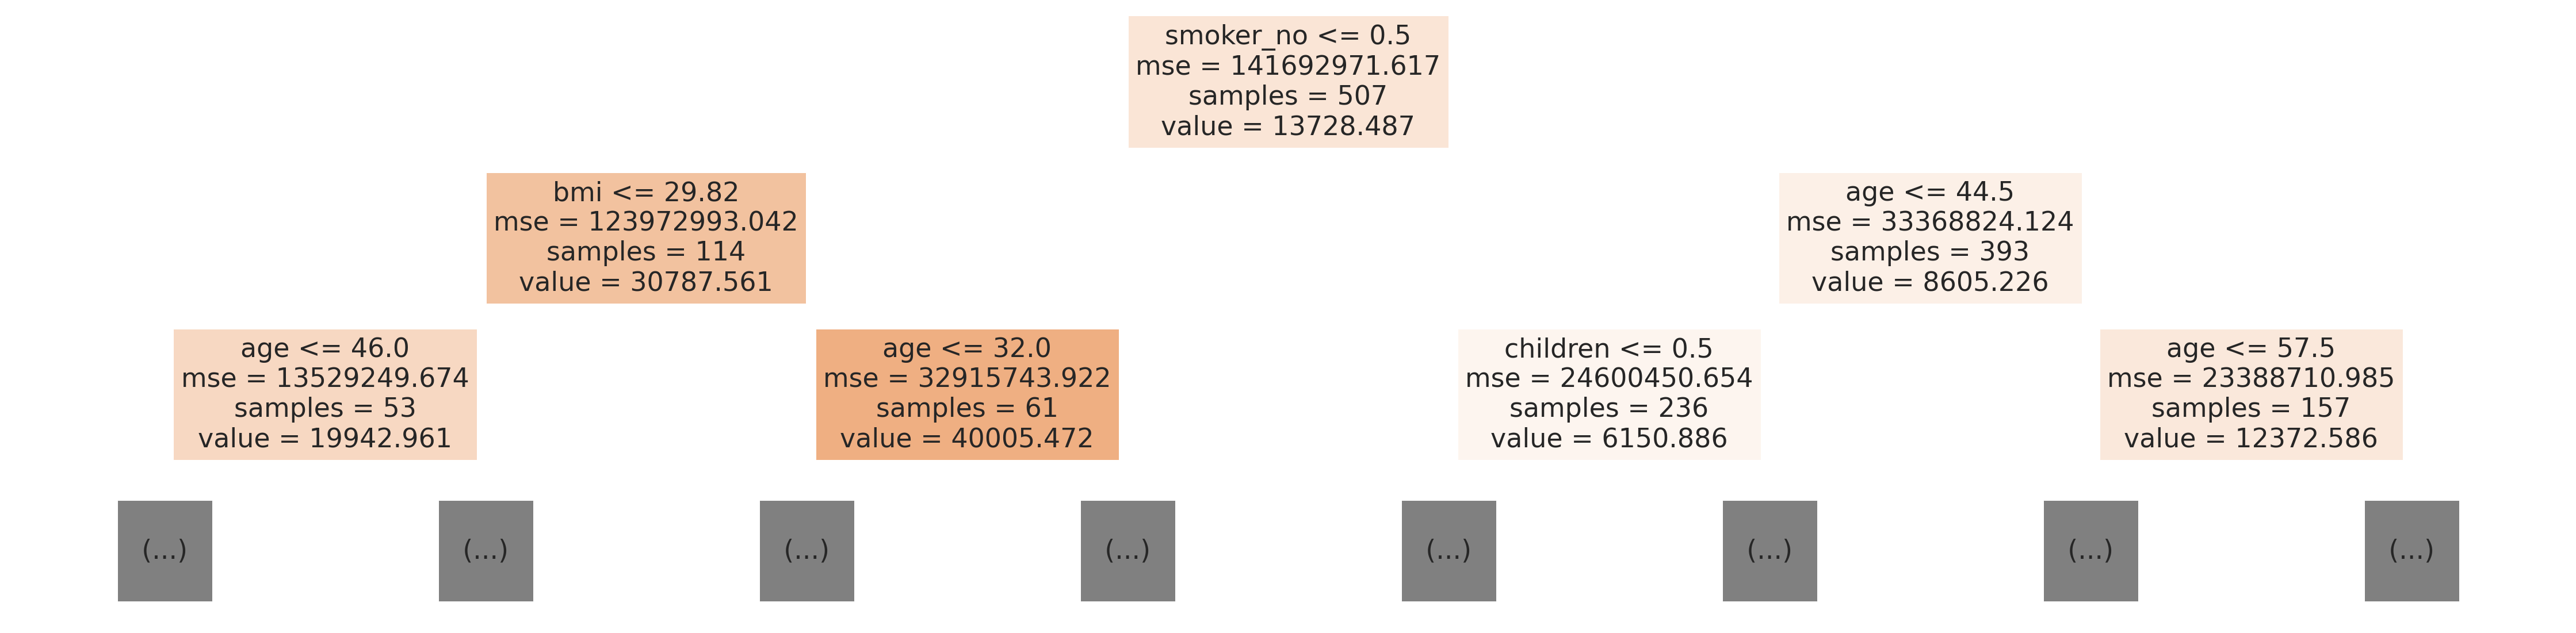

In [150]:
# displaying the first descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True);

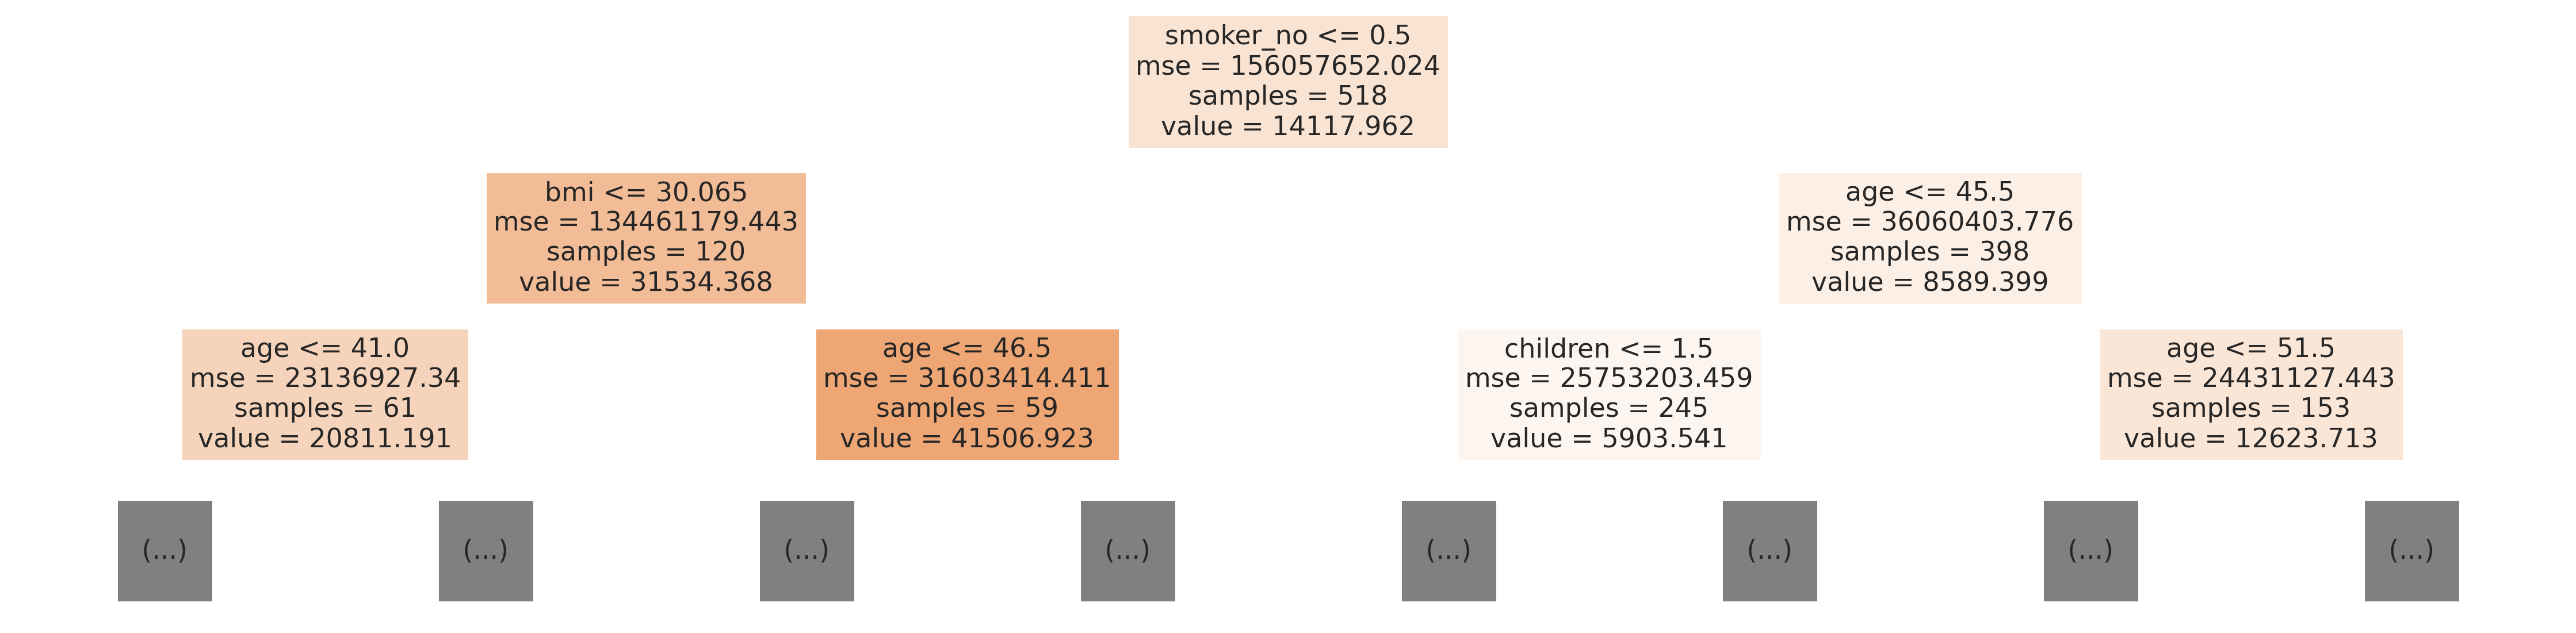

In [151]:
# displaying the last descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[99], max_depth=2, feature_names=X_train.columns, filled=True);

In [152]:
len(forest.estimators_)

100

In [153]:
tree_text = export_text(forest.estimators_[0], max_depth=2, feature_names=list(X_train.columns))
print(tree_text)

|--- smoker_no <= 0.50
|   |--- bmi <= 29.82
|   |   |--- age <= 46.00
|   |   |   |--- truncated branch of depth 11
|   |   |--- age >  46.00
|   |   |   |--- truncated branch of depth 7
|   |--- bmi >  29.82
|   |   |--- age <= 32.00
|   |   |   |--- truncated branch of depth 8
|   |   |--- age >  32.00
|   |   |   |--- truncated branch of depth 12
|--- smoker_no >  0.50
|   |--- age <= 44.50
|   |   |--- children <= 0.50
|   |   |   |--- truncated branch of depth 15
|   |   |--- children >  0.50
|   |   |   |--- truncated branch of depth 15
|   |--- age >  44.50
|   |   |--- age <= 57.50
|   |   |   |--- truncated branch of depth 13
|   |   |--- age >  57.50
|   |   |   |--- truncated branch of depth 13



In [154]:
# feature importance
forest.feature_importances_

array([0.12938006, 0.20906477, 0.02298678, 0.00364665, 0.00335937,
       0.39273064, 0.21907518, 0.00444371, 0.00480168, 0.00532606,
       0.00518511])

In [155]:
importances = {
    'Features':X_train.columns,
    'Weights':tree.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

Features   Weights
5          smoker_no  0.715674
1                bmi  0.178070
0                age  0.098708
2           children  0.007548
3         sex_female  0.000000
4           sex_male  0.000000
6         smoker_yes  0.000000
7   region_northeast  0.000000
8   region_northwest  0.000000
9   region_southeast  0.000000
10  region_southwest  0.000000

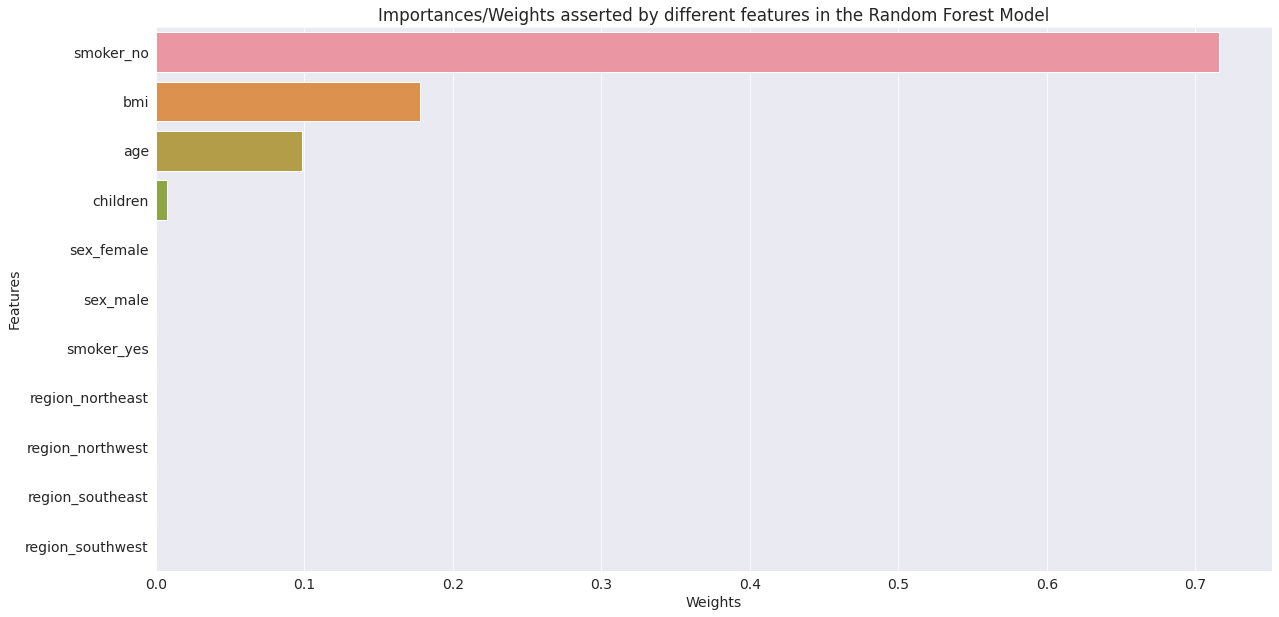

In [156]:
plt.title("Importances/Weights asserted by different features in the Random Forest Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

Just like the descision Tree model, our random forest model is most affected if a person is a non smoker.

#### Hyperparamter Tuning for Random Forest Model

We will tune the following hyperparameters for our random forest model:

  1. n_estimators (number of descision trees to use)

  2. max_depth

  3. max_leaf_nodes

<b> Tuning the hyperparameter n_estimators </b>

By default, the hyperparameter n_estimators is set to 100.

In [157]:
n_estimators_values = list(range(50,550,50))

training_rmse = []
validation_rmse = []

In [158]:
for i in n_estimators_values:
  forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,forest.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,forest.predict(X_val))))

In [159]:
errors_df = pd.DataFrame({
    'n_estimators':n_estimators_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE',ascending = True)

n_estimators  Training RMSE  Validation RMSE
3           200    1786.099337      5125.158709
8           450    1773.208332      5125.509590
9           500    1773.707482      5126.080690
7           400    1771.171440      5126.173454
6           350    1765.459498      5129.108202
2           150    1785.130602      5130.227624
5           300    1769.803451      5130.534143
4           250    1776.827901      5130.703464
1           100    1829.099862      5133.201584
0            50    1870.241314      5145.085678

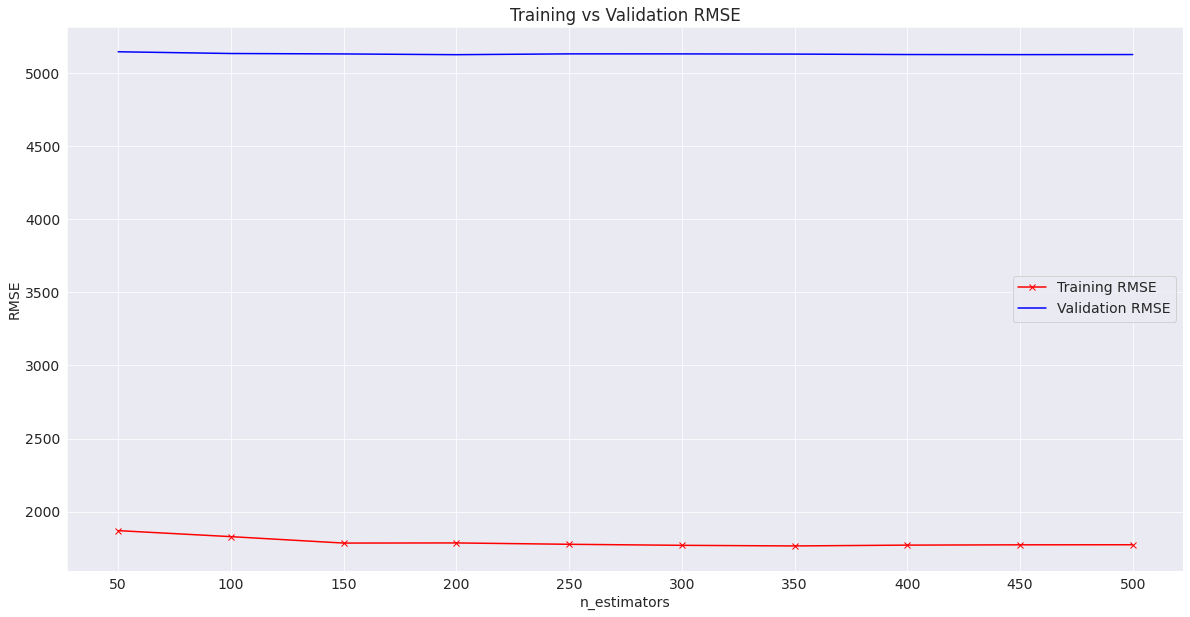

In [160]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.plot(errors_df['n_estimators'], errors_df["Training RMSE"], color = 'red', marker = 'x')
plt.plot(errors_df['n_estimators'], errors_df["Validation RMSE"], color = 'blue')
plt.xticks(n_estimators_values)
plt.legend(['Training RMSE','Validation RMSE']);

Our model has lowest validation RMSE when n_estimators = 200. Thus, we will tune our model that way.

<b> Tuning the Hyperparameter max_depth </b>

In [161]:
max_depth_values = list(range(2,24,2))

training_rmse = []
validation_rmse = []

In [162]:
for i in max_depth_values:
  forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,forest.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,forest.predict(X_val))))

In [163]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE',ascending = True)

Max Depth  Training RMSE  Validation RMSE
1           4    4145.659220      4840.391728
2           6    3421.355161      4942.175482
3           8    2584.421113      5033.842019
4          10    2052.761992      5101.910302
5          12    1857.871540      5115.430679
8          18    1783.460272      5124.597063
10         22    1786.099337      5125.158709
7          16    1783.720361      5127.234207
9          20    1785.003057      5129.710019
6          14    1802.785474      5131.596458
0           2    4968.194100      5178.956601

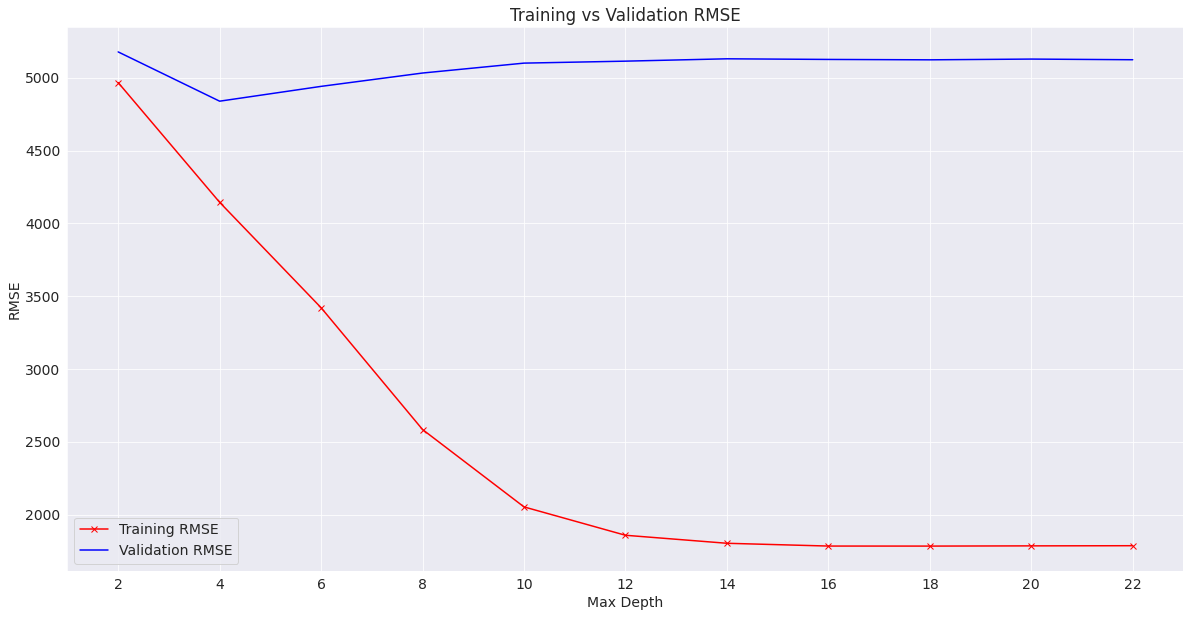

In [164]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.plot(errors_df['Max Depth'], errors_df["Training RMSE"], color = 'red', marker = 'x')
plt.plot(errors_df['Max Depth'], errors_df["Validation RMSE"], color = 'blue')
plt.xticks(max_depth_values)
plt.legend(['Training RMSE','Validation RMSE']);

Our model performs best when max_depth = 4. Thus, we will tune our model that way.

<b> Tuning the Hyperparameter ma_leaf_nodes </b>

By default, max_leaf_nodes is set to None. If None then unlimited number of leaf nodes.

In [165]:
max_leaf_nodes_values = [2 ** i for i in range(1,11)]

training_rmse = []
validation_rmse = []

In [166]:
for i in max_leaf_nodes_values:
  forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 4, max_leaf_nodes = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,forest.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,forest.predict(X_val))))

In [167]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE',ascending = True)

Max_leaf_nodes  Training RMSE  Validation RMSE
3              16    4145.720888      4839.778078
4              32    4145.720888      4839.778078
5              64    4145.720888      4839.778078
6             128    4145.720888      4839.778078
7             256    4145.720888      4839.778078
8             512    4145.720888      4839.778078
9            1024    4145.720888      4839.778078
2               8    4417.953943      4889.600436
1               4    4968.194100      5178.956601
0               2    7422.304840      7361.605798

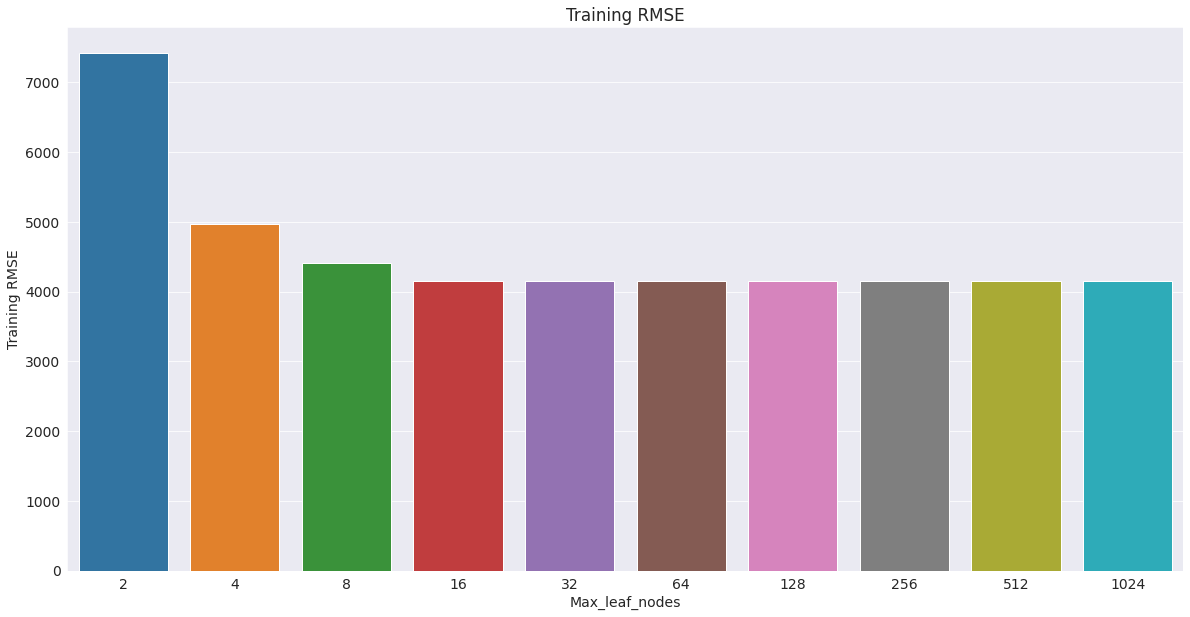

In [168]:
# plotting in graph
plt.title('Training RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training RMSE', data = errors_df);

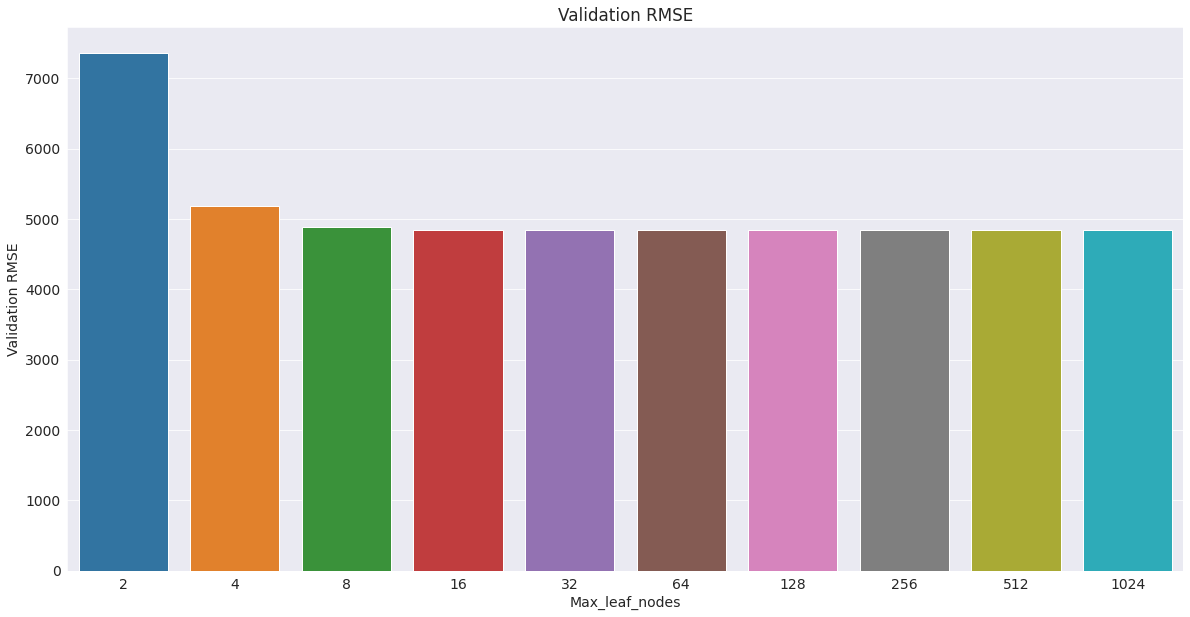

In [169]:
# plotting in graph
plt.title('Validation RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation RMSE', data = errors_df);

Our model has lowest training and validation RMSE when max_leaf_nodes = 16. Thus, we will tune our model that way.

#### Making Predictions on Testing Data

In [170]:
# Optimized Model
forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 4, max_leaf_nodes = 16).fit(X_train,y_train)

In [171]:
test_pred = forest.predict(X_test)

In [172]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  4297.033550186006


Our random forest Model has performed even better than the descision tree model. But, we will test our data using a XGBRegressor to see if we can get any better predictions.

### <b> Gradient Boosting Machines </b>

#### Training XGBRegressor Model

In [66]:
from xgboost import XGBRegressor
# the folowwing tuned hyperparameters are selected from the random forest model
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 4, max_leaf_nodes = 16).fit(X_train,y_train)

[09:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [67]:
train_pred = xgb.predict(X_train)

In [68]:
validation_pred = xgb.predict(X_val)

In [173]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_rmse

1829.099862087776

In [174]:
validation_rmse = np.sqrt(mean_squared_error(y_val, validation_pred))
validation_rmse

5133.201583537497

It looks like our model is overfitting with the training data. Thus, to reduce overfitting, we will tune the model's hyperparameters in the next step.

In [175]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

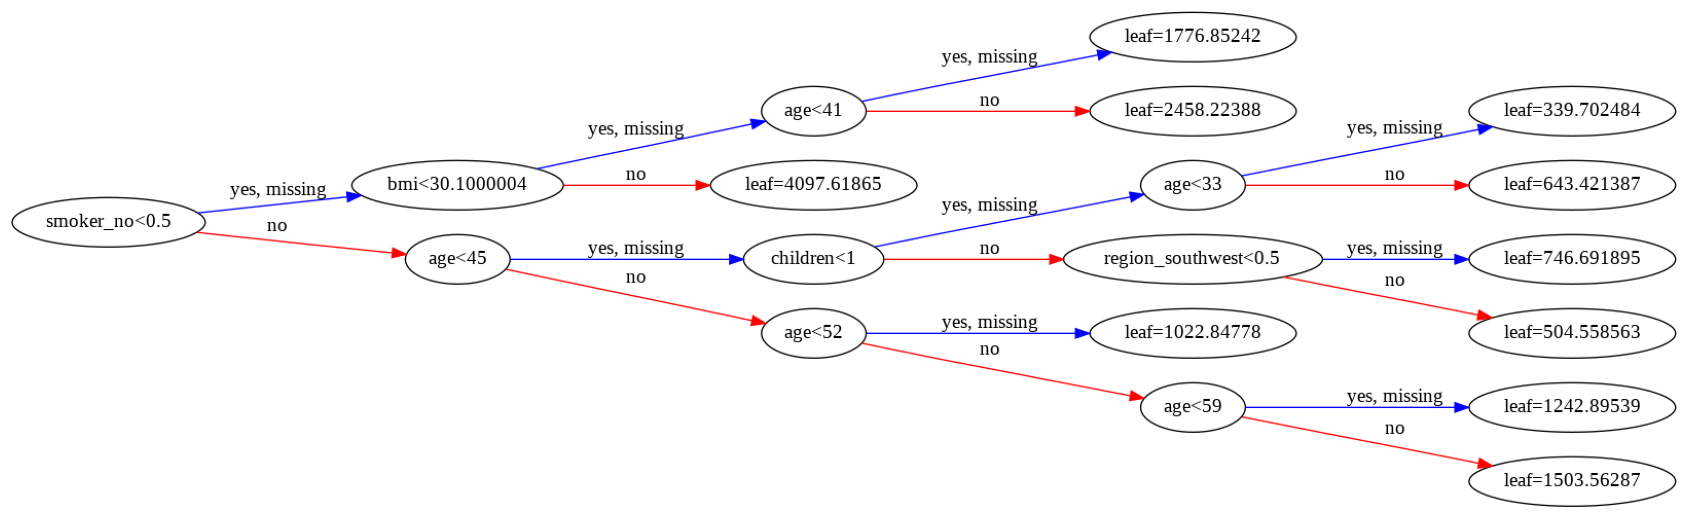

In [176]:
# First descision tree
plot_tree(xgb, rankdir='LR',num_trees=0);

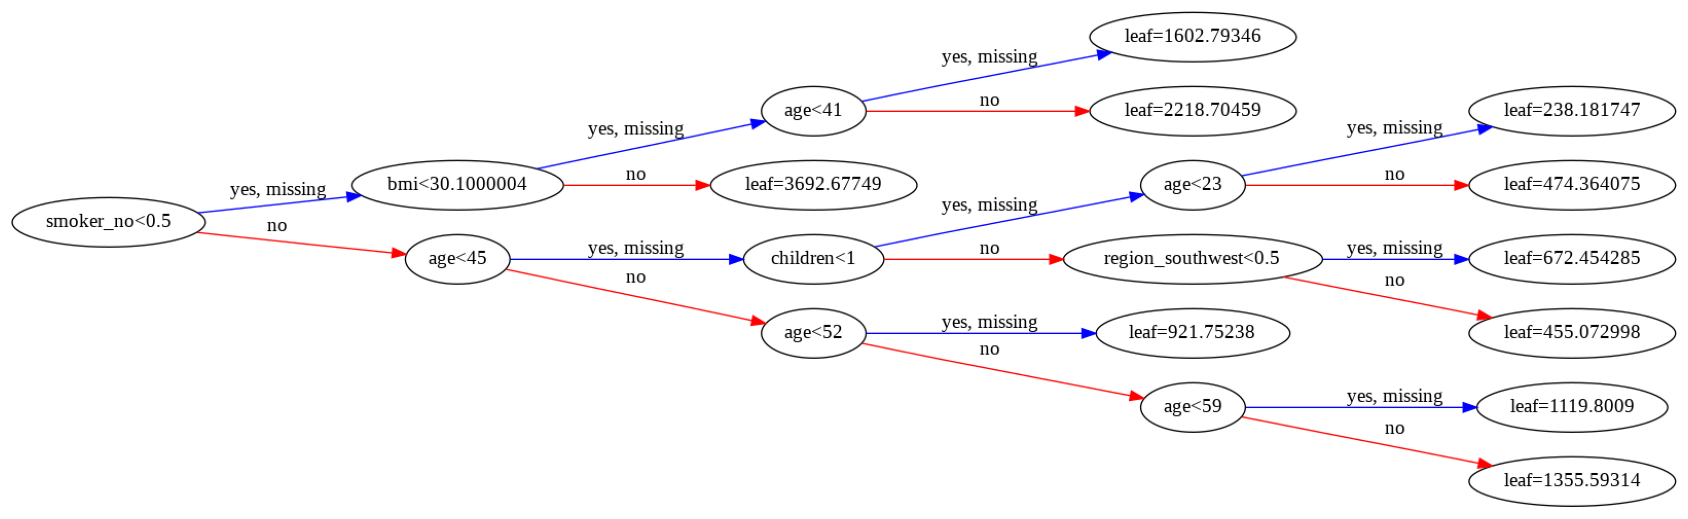

In [177]:
# Second Descision Tree
plot_tree(xgb, rankdir='LR',num_trees=1);

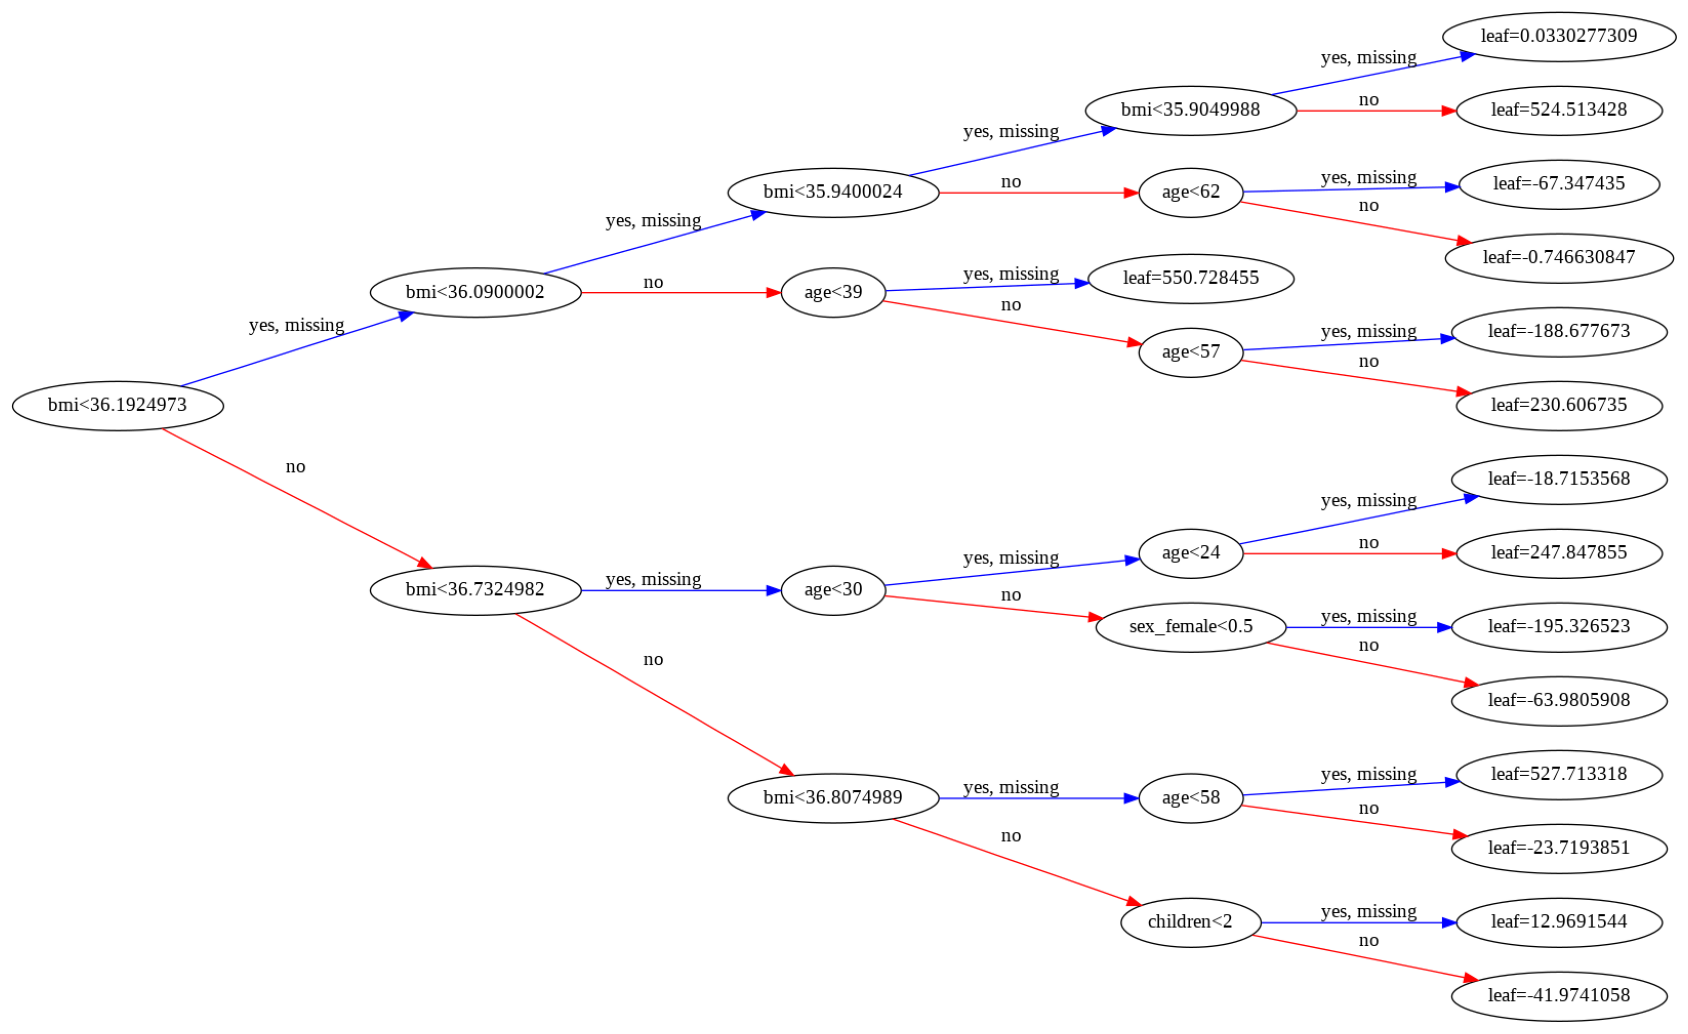

In [178]:
# Last Descision Tree
plot_tree(xgb, rankdir='LR',num_trees=199);

Notice how the trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [179]:
tree = xgb.get_booster().get_dump()

In [180]:
len(tree)  # value of n_estimators

200

In [181]:
# First Tree in texual formal
print(tree[0])

0:[smoker_no<0.5] yes=1,no=2,missing=1
	1:[bmi<30.1000004] yes=3,no=4,missing=3
		3:[age<41] yes=7,no=8,missing=7
			7:leaf=1776.85242
			8:leaf=2458.22388
		4:leaf=4097.61865
	2:[age<45] yes=5,no=6,missing=5
		5:[children<1] yes=9,no=10,missing=9
			9:[age<33] yes=13,no=14,missing=13
				13:leaf=339.702484
				14:leaf=643.421387
			10:[region_southwest<0.5] yes=15,no=16,missing=15
				15:leaf=746.691895
				16:leaf=504.558563
		6:[age<52] yes=11,no=12,missing=11
			11:leaf=1022.84778
			12:[age<59] yes=17,no=18,missing=17
				17:leaf=1242.89539
				18:leaf=1503.56287



In [182]:
xgb.feature_importances_

array([0.02421646, 0.02842991, 0.00898796, 0.01016013, 0.        ,
       0.8887463 , 0.        , 0.0091836 , 0.01509012, 0.00706036,
       0.00812523], dtype=float32)

In [183]:
importances = {
    'Features':X_train.columns,
    'Weights':xgb.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

Features   Weights
5          smoker_no  0.888746
1                bmi  0.028430
0                age  0.024216
8   region_northwest  0.015090
3         sex_female  0.010160
7   region_northeast  0.009184
2           children  0.008988
10  region_southwest  0.008125
9   region_southeast  0.007060
4           sex_male  0.000000
6         smoker_yes  0.000000

In [185]:
sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)

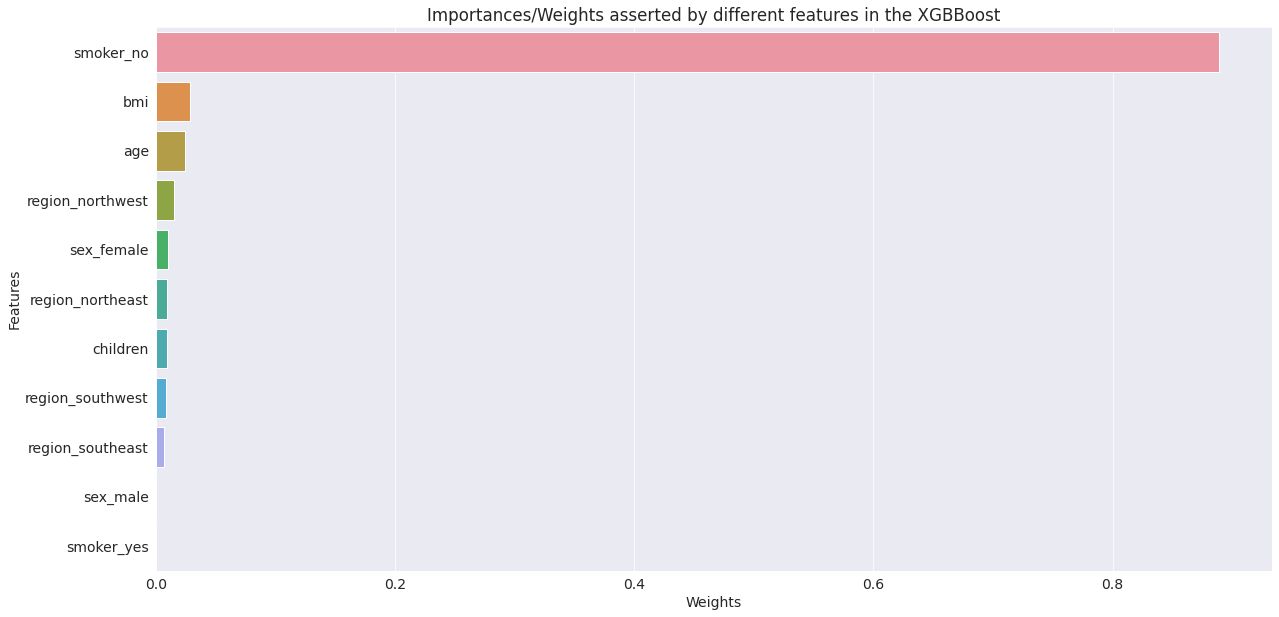

In [186]:
plt.title("Importances/Weights asserted by different features in the XGBBoost")
sns.barplot(x = 'Weights', y ='Features', data = importances);

Like all the previous models, the current model also seems to be most affected by the data if the person is a non smoker while making preditions.

#### Hyperparameter Tuning for GBM Model

We will tune the following Hyeprparameters:

  1. max_depth

  2. max_leaf_nodes

  3. n_estimators

  4. booster

  5. min_child_weight

In [188]:
# Our original Model
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 4, max_leaf_nodes = 16, silent = True).fit(X_train,y_train)

<b> Tuning the Hyperparameter max_depth </b>

In [193]:
max_depth_values = list(range(2,30,2))

training_rmse = []
validation_rmse = []

In [194]:
for i in max_depth_values:
  xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = i, max_leaf_nodes = 16, silent = True).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,xgb.predict(X_val))))

In [196]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE', ascending = True)

Max Depth  Training RMSE  Validation RMSE
0           2    3927.133253      4745.726107
1           4    2464.412564      5266.284263
10         22       0.213686      5318.685709
11         24       0.213385      5323.018663
12         26       0.213385      5323.019000
13         28       0.213385      5323.019000
7          16       0.419991      5329.045745
9          20       0.211066      5339.226064
2           6    1145.587189      5344.480439
8          18       0.216812      5351.750089
6          14       1.716118      5356.665133
5          12       6.453129      5370.747841
3           8     226.191126      5428.174240
4          10      60.351212      5455.283572

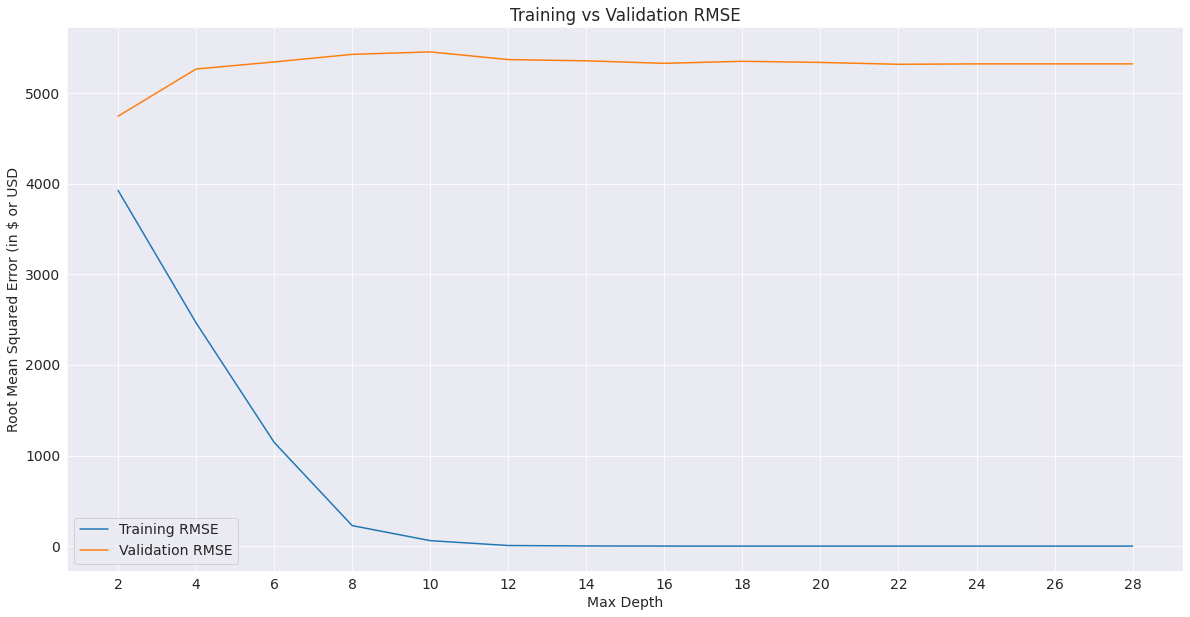

In [197]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error (in $ or USD')
plt.plot(errors_df['Max Depth'], errors_df["Training RMSE"])
plt.plot(errors_df['Max Depth'], errors_df["Validation RMSE"])
plt.xticks(max_depth_values)
plt.legend(['Training RMSE','Validation RMSE']);

Our model performs best when max_depth = 2. Thus, we will tune our model that way.

In [198]:
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 2, max_leaf_nodes = 16, silent = True).fit(X_train,y_train)

<b> Tuning the Hyperparameter max_leaf_nodes </b>

In [202]:
max_leaf_nodes_values = [2 ** i for i in range(1,12)]

training_rmse = []
validation_rmse = []

In [203]:
for i in max_leaf_nodes_values:
  xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 2, max_leaf_nodes = i, silent = True).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,xgb.predict(X_val))))

In [205]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE', ascending = True)

Max_leaf_nodes  Training RMSE  Validation RMSE
0                2    3927.133253      4745.726107
1                4    3927.133253      4745.726107
2                8    3927.133253      4745.726107
3               16    3927.133253      4745.726107
4               32    3927.133253      4745.726107
5               64    3927.133253      4745.726107
6              128    3927.133253      4745.726107
7              256    3927.133253      4745.726107
8              512    3927.133253      4745.726107
9             1024    3927.133253      4745.726107
10            2048    3927.133253      4745.726107

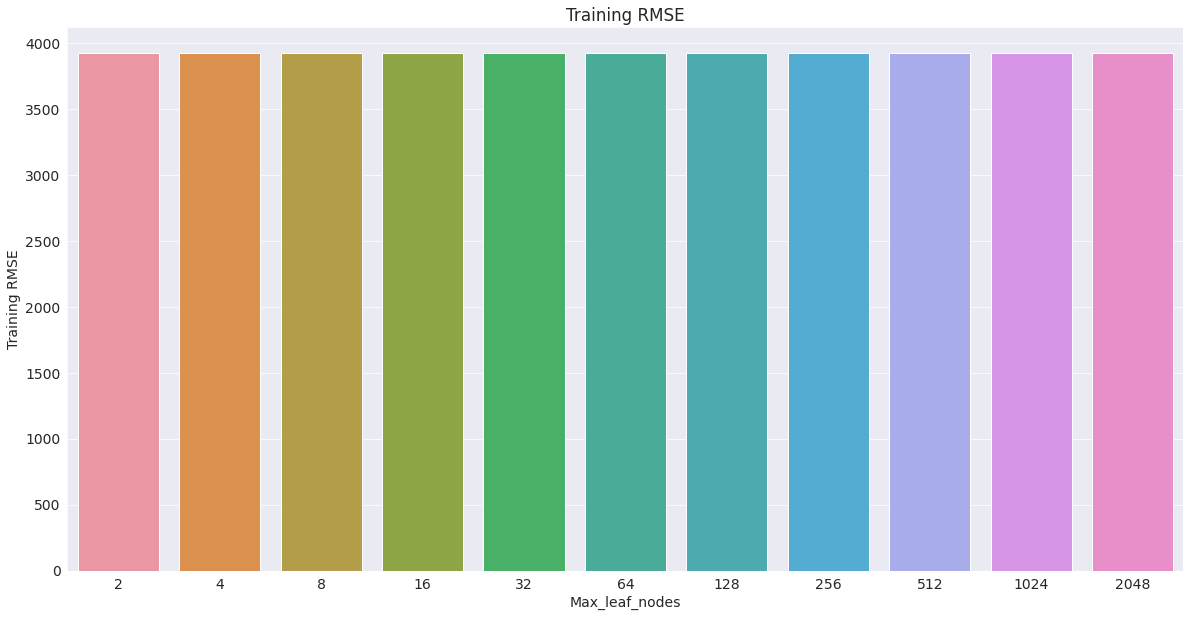

In [206]:
# plotting in graph
plt.title('Training RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training RMSE', data = errors_df);

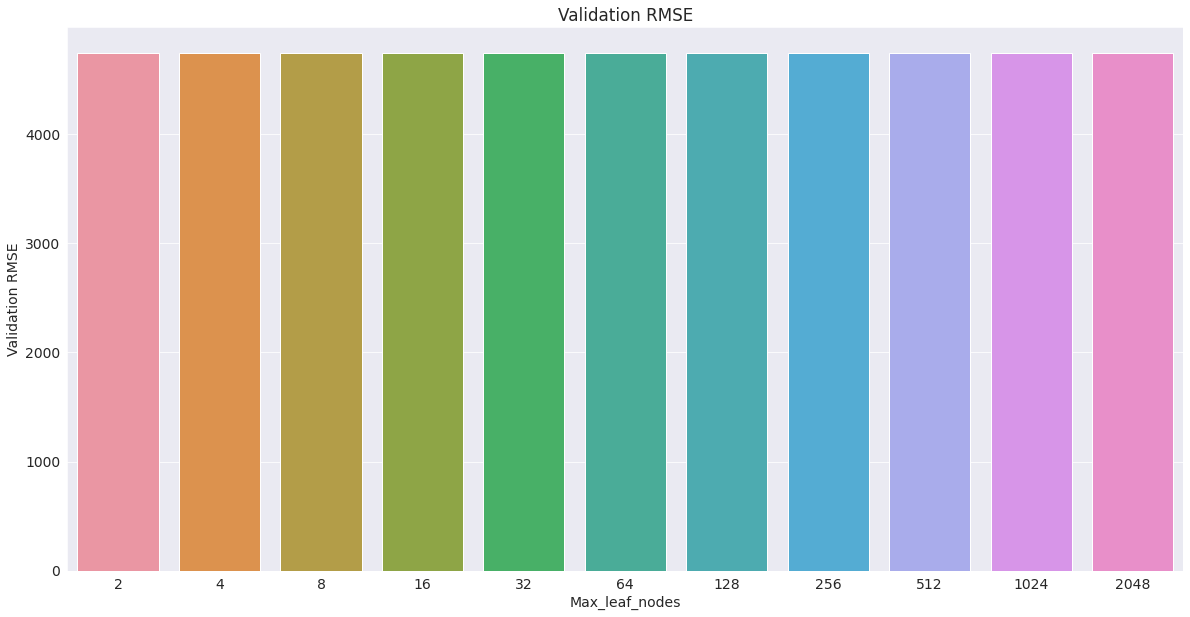

In [207]:
# plotting in graph
plt.title('Validation RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation RMSE', data = errors_df);

It looks like our model is unaffected much by changing the value of hyperparameter max_leaf_nodes. Maybe lets set max_leaf_nodes = 128 to see if our model will perform any better than the random forest model.

<b> Tuning Hyperparameter n_estimators </b>

In [209]:
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 2, max_leaf_nodes = 128, silent = True).fit(X_train,y_train)

In [210]:
n_estimators_values = list(range(50,1050,50))

training_rmse = []
validation_rmse = []

In [211]:
for i in n_estimators_values:
  xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = i, max_depth = 2, max_leaf_nodes = 128, silent = True).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,xgb.predict(X_val))))

In [212]:
errors_df = pd.DataFrame({
    'n_estimators':n_estimators_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE', ascending = True)

n_estimators  Training RMSE  Validation RMSE
1            100    4161.289608      4682.584624
2            150    4029.236934      4702.576677
0             50    4340.464125      4735.906861
3            200    3927.133253      4745.726107
4            250    3823.510774      4822.686598
5            300    3709.918468      4873.326419
6            350    3626.984650      4917.340832
7            400    3545.614700      4968.086424
8            450    3478.063360      5010.315802
9            500    3418.985111      5056.304245
10           550    3361.923994      5110.401708
11           600    3314.740798      5132.328176
12           650    3256.582926      5173.809387
13           700    3217.813752      5204.484215
14           750    3167.965542      5208.178115
15           800    3128.660043      5225.384118
16           850    3083.813641      5244.074686
17           900    3046.476815      5272.779010
18           950    3013.686425      5288.822948
19          1000    2977.051585      5316.293027

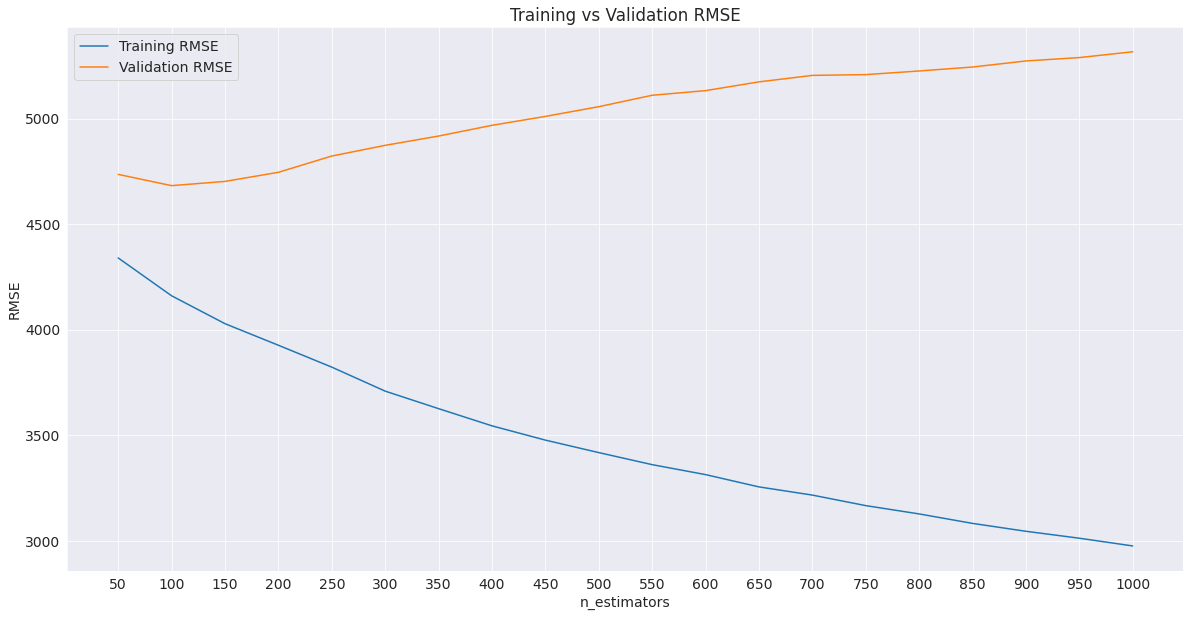

In [213]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.plot(errors_df['n_estimators'], errors_df["Training RMSE"])
plt.plot(errors_df['n_estimators'], errors_df["Validation RMSE"])
plt.xticks(n_estimators_values)
plt.legend(['Training RMSE','Validation RMSE']);

Our model performs best on both training and validation set when n_estimators = 100. Thus, we will tune our model that way.

In [214]:
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 100, max_depth = 2, max_leaf_nodes = 128, silent = True).fit(X_train,y_train)

<b> Tuning Hyperparameter Booster </b>

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

Old model

In [217]:
xgb1 = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 100, max_depth = 2, max_leaf_nodes = 128, silent = True).fit(X_train,y_train)

train1_rmse = np.sqrt(mean_squared_error(y_train, xgb1.predict(X_train)))
vali1_rmse = np.sqrt(mean_squared_error(y_val, xgb1.predict(X_val)))

In [218]:
train1_rmse,vali1_rmse

(4161.289607777894, 4682.584624410597)

New model

In [219]:
xgb2 = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 100, max_depth = 2, max_leaf_nodes = 128, silent = True, booster = 'gblinear').fit(X_train,y_train)

train2_rmse = np.sqrt(mean_squared_error(y_train, xgb2.predict(X_train)))
vali2_rmse = np.sqrt(mean_squared_error(y_val, xgb2.predict(X_val)))

In [220]:
train2_rmse,vali2_rmse

(9448.609365819038, 8713.38093096761)

In [221]:
tuned_df = pd.DataFrame({
    'Models':['Old Training RMSE', 'New Training RMSE', 'Old Validation RMSE', 'New Validation RMSE'],
    'Values':[train1_rmse,train2_rmse,vali1_rmse,vali2_rmse],
    'Bool':['Old','New','Old','New']
})

tuned_df

Models       Values Bool
0    Old Training RMSE  4161.289608  Old
1    New Training RMSE  9448.609366  New
2  Old Validation RMSE  4682.584624  Old
3  New Validation RMSE  8713.380931  New

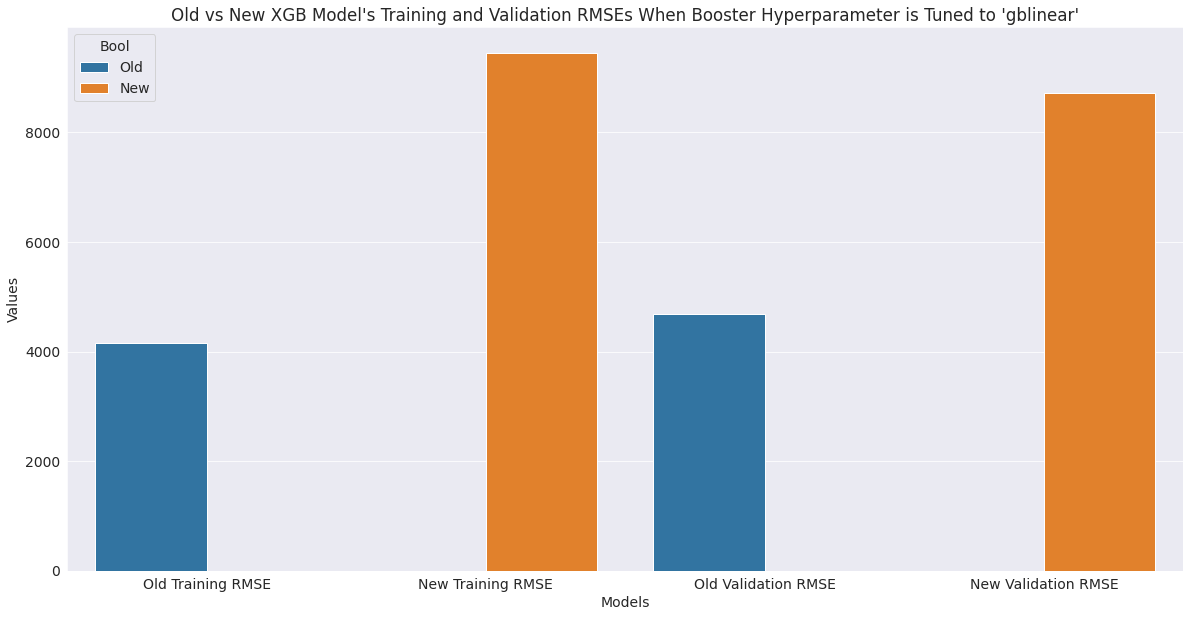

In [223]:
plt.title('Old vs New XGB Model\'s Training and Validation RMSEs When Booster Hyperparameter is Tuned to \'gblinear\'')
sns.barplot(x = 'Models', y = 'Values', hue = 'Bool', data = tuned_df);

Clearly, a linear model is not well suited for this dataset.

<b> Tuning Hyperparameter min_child_weight </b>

In [251]:
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 100, max_depth = 2, max_leaf_nodes = 128, silent = True).fit(X_train,y_train)

In [259]:
max_child_weight_values = list(range(1,100))

training_rmse = []
validation_rmse = []

In [260]:
for i in max_child_weight_values:
  xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = i, max_depth = 2, max_leaf_nodes = 128, silent = True, max_child_weight = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,xgb.predict(X_val))))

In [261]:
errors_df = pd.DataFrame({
    'max_child_weight_values':max_child_weight_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE', ascending = True).head(20)

max_child_weight_values  Training RMSE  Validation RMSE
93                       94    4176.897484      4676.462470
92                       93    4179.198917      4676.802962
94                       95    4174.958145      4677.586391
95                       96    4173.175497      4677.911275
98                       99    4167.472407      4678.713678
90                       91    4186.717497      4679.524997
97                       98    4169.442938      4679.665964
96                       97    4171.064048      4679.714089
91                       92    4184.440756      4679.717211
89                       90    4188.420485      4680.939955
87                       88    4192.842849      4681.878866
88                       89    4190.667071      4682.156844
74                       75    4228.630400      4682.324514
80                       81    4209.793945      4682.375879
79                       80    4213.136871      4682.414128
73                       74    4232.737316      4682.557261
72                       73    4237.691689      4682.996124
76                       77    4222.881405      4683.034998
78                       79    4216.460004      4683.455410
86                       87    4195.138870      4683.767299

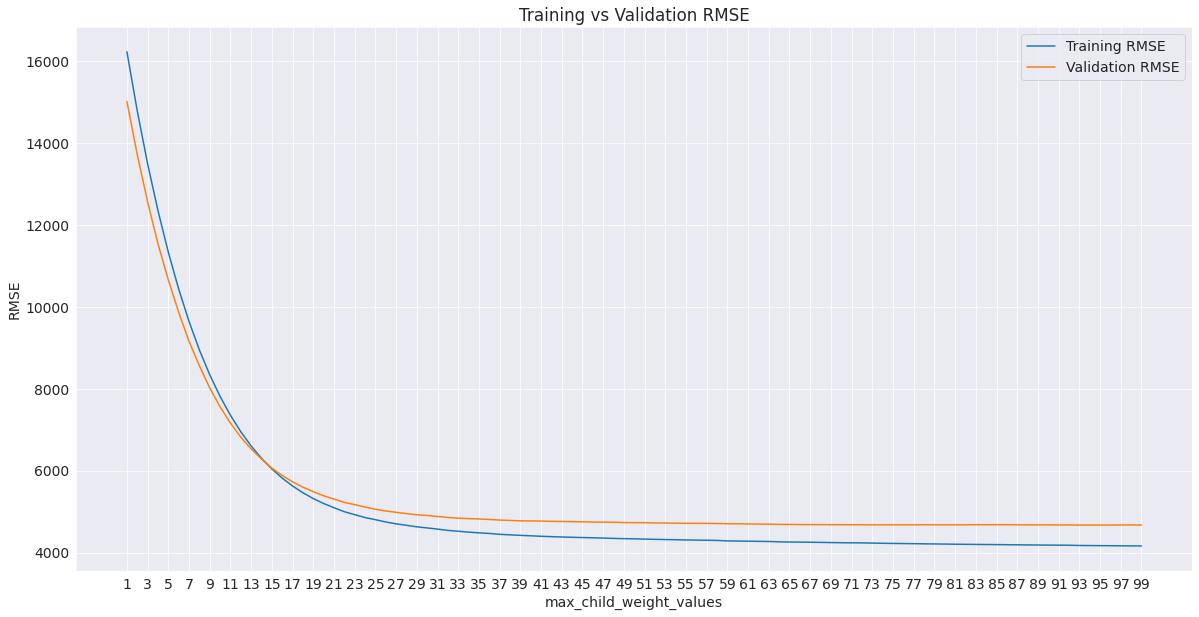

In [265]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('max_child_weight_values')
plt.ylabel('RMSE')
plt.plot(errors_df['max_child_weight_values'], errors_df["Training RMSE"])
plt.plot(errors_df['max_child_weight_values'], errors_df["Validation RMSE"])
plt.xticks(list(range(1,100,2)))
plt.legend(['Training RMSE','Validation RMSE']);

Our model has the best efficiency on both training and validation set when max_child weight = 94. Thus, we will tune our model that way.

#### Making Predictions on the Testing Data

In [266]:
xgb = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = i, max_depth = 2, max_leaf_nodes = 128, silent = True, max_child_weight = 94).fit(X_train,y_train)

In [267]:
test_pred = xgb.predict(X_test)

In [268]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  4304.087485307359


Thus, we can conclude that our XGBRegressor model has the best performance on the testing data.